# Comprehensive Exploratory Data Analysis (EDA)
## Global Land Temperatures by Country Dataset

This notebook provides a thorough exploratory data analysis of the Global Land Temperatures by Country dataset. The analysis covers:

- **Data Overview & Quality Assessment**
- **Statistical Analysis & Distribution**
- **Temporal Patterns & Trends**
- **Geographic Analysis**
- **Outlier Detection**
- **Correlation Analysis**
- **Predictive Modeling**
- **Interactive Visualizations**

---

## 1. Library Imports and Setup

First, let's import all necessary libraries and configure the environment for our analysis.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import missingno as msno

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


## 2. Data Loading and Initial Inspection

Let's load the dataset and perform initial inspection to understand its structure, dimensions, and basic characteristics.

In [2]:
df = pd.read_csv('/kaggle/input/bycountry/GlobalLandTemperaturesByCountry.csv')

print("="*60)
print("INITIAL DATA INSPECTION")
print("="*60)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nRandom 5 rows:")
print(df.sample(5))


INITIAL DATA INSPECTION
Dataset shape: (577462, 4)
Number of rows: 577,462
Number of columns: 4

Column names:
1. dt
2. AverageTemperature
3. AverageTemperatureUncertainty
4. Country

First 5 rows:
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

Last 5 rows:
                dt  AverageTemperature  AverageTemperatureUncertainty  \
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                    

## 3. Data Types and Information Analysis

Understanding the data types, memory usage, and converting the date column to proper datetime format for temporal analysis.

In [3]:
print("="*60)
print("DATA TYPES AND BASIC INFORMATION")
print("="*60)

print("Data types:")
print(df.dtypes)

print("\nDataset info:")
df.info()

print("\nMemory usage:")
print(df.memory_usage(deep=True))

print(f"\nTotal memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Convert date column to datetime if it exists
if 'dt' in df.columns:
    df['dt'] = pd.to_datetime(df['dt'])
    print(f"\nDate column converted to datetime")
    print(f"Date range: {df['dt'].min()} to {df['dt'].max()}")
    
    # Extract date components
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month
    df['month_name'] = df['dt'].dt.month_name()
    df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                   3: 'Spring', 4: 'Spring', 5: 'Spring',
                                   6: 'Summer', 7: 'Summer', 8: 'Summer',
                                   9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})


DATA TYPES AND BASIC INFORMATION
Data types:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB

Memory usage:
Index                                 132
dt                               38689954
AverageTemperature                4619696
AverageTemperatureUncertainty     4619696
Country                          38678041
dtype: i

## 4. Missing Values Analysis

Comprehensive analysis of missing data patterns, including visualizations to understand the extent and distribution of missing values across the dataset.

MISSING VALUES ANALYSIS
Missing values summary:
                               Missing Count  Missing Percentage
AverageTemperature                     32651               5.650
AverageTemperatureUncertainty          31912               5.530

Total missing values: 64,563
Percentage of total dataset: 1.40%

Missing values by Country (top 10):
               AverageTemperature  AverageTemperatureUncertainty
Country                                                         
Reunion                      1039                           1039
Mauritius                    1039                           1039
Mayotte                       958                            958
Madagascar                    958                            958
Comoros                       958                            958
Seychelles                    958                            958
Antarctica                    764                             25
Niger                         585                            585
Baham

<Figure size 1200x800 with 0 Axes>

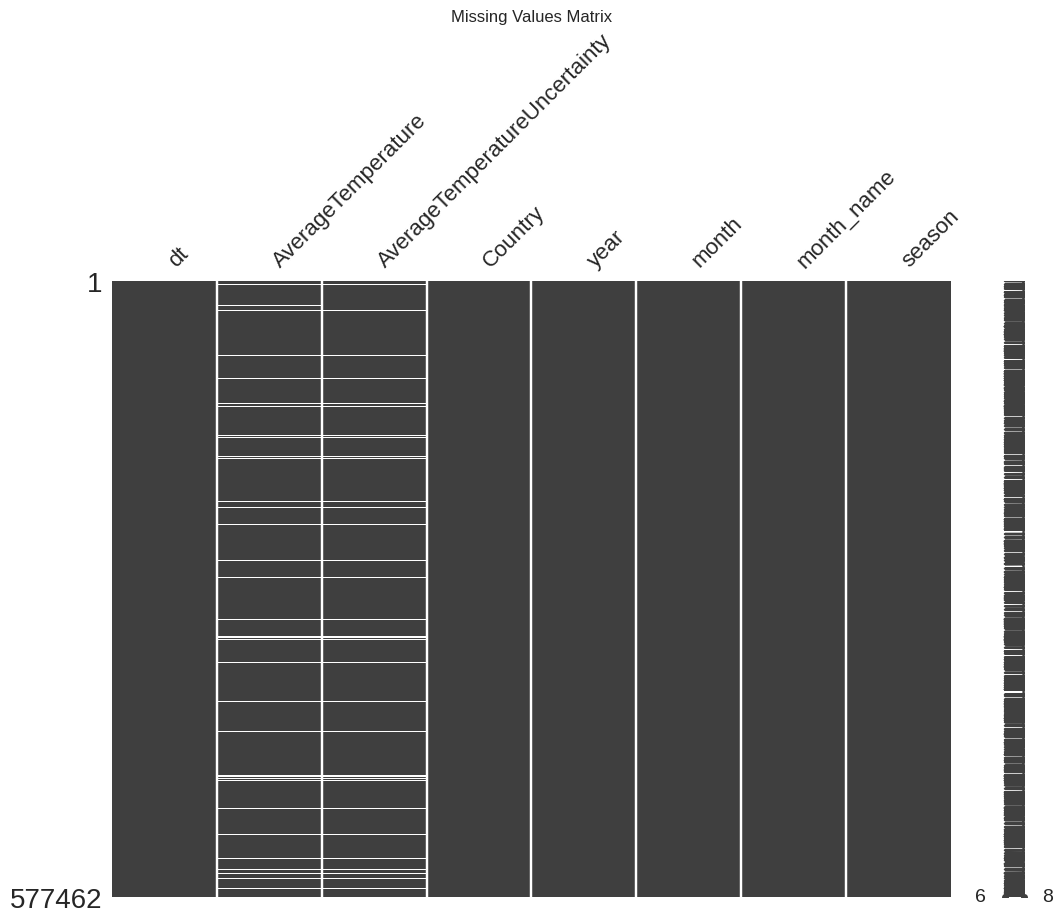

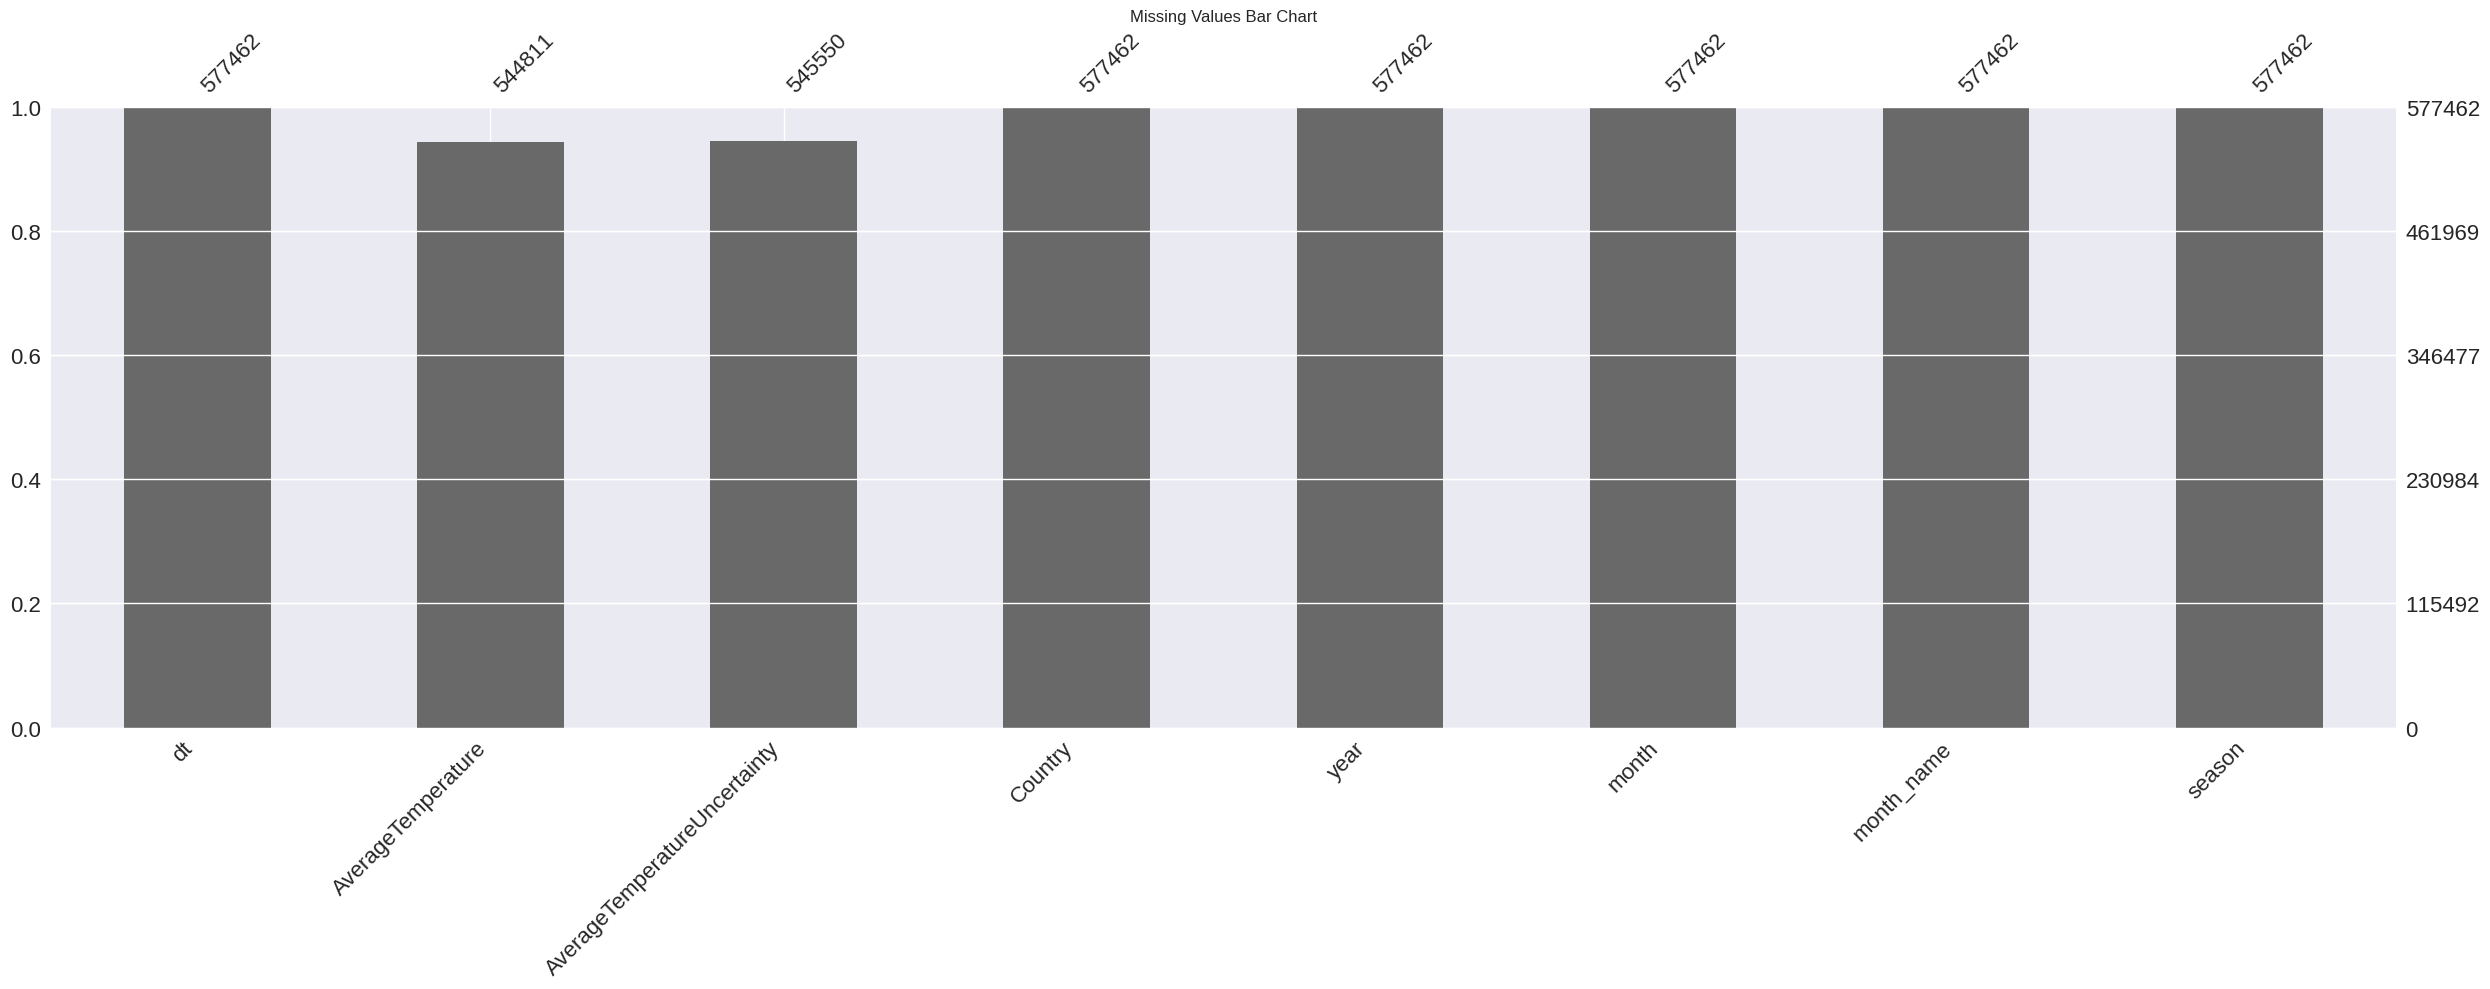

In [4]:

print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Overall missing values
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
}).round(2)

print("Missing values summary:")
print(missing_df[missing_df['Missing Count'] > 0])

print(f"\nTotal missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of total dataset: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

# Missing values by country (if applicable)
if 'Country' in df.columns:
    missing_by_country = df.groupby('Country').agg({
        'AverageTemperature': lambda x: x.isnull().sum(),
        'AverageTemperatureUncertainty': lambda x: x.isnull().sum()
    }).round(2)
    
    print("\nMissing values by Country (top 10):")
    print(missing_by_country.sort_values('AverageTemperature', ascending=False).head(10))

# Visualize missing values
plt.figure(figsize=(12, 8))
msno.matrix(df, figsize=(12, 8))
plt.title('Missing Values Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.tight_layout()
plt.show()


## 5. Descriptive Statistics

Detailed statistical summary of numerical and categorical variables, including measures of central tendency, dispersion, and shape of distributions.

In [5]:

print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

# Numerical columns statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns statistics:")
print(df[numerical_cols].describe())

# Additional statistics
print("\nAdditional statistics for numerical columns:")
for col in numerical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Skewness: {df[col].skew():.3f}")
        print(f"  Kurtosis: {df[col].kurtosis():.3f}")
        print(f"  Variance: {df[col].var():.3f}")
        print(f"  Standard Deviation: {df[col].std():.3f}")
        print(f"  Coefficient of Variation: {df[col].std()/df[col].mean():.3f}")

# Categorical columns statistics
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"\nCategorical columns: {list(categorical_cols)}")
    for col in categorical_cols:
        print(f"\n{col} - Unique values: {df[col].nunique()}")
        print(df[col].value_counts().head(10))


DESCRIPTIVE STATISTICS
Numerical columns statistics:
       AverageTemperature  AverageTemperatureUncertainty       year      month
count          544811.000                     545550.000 577462.000 577462.000
mean               17.193                          1.019   1908.819      6.496
std                10.954                          1.202     65.917      3.451
min               -37.658                          0.052   1743.000      1.000
25%                10.025                          0.323   1862.000      3.000
50%                20.901                          0.571   1914.000      6.000
75%                25.814                          1.206   1964.000      9.000
max                38.842                         15.003   2013.000     12.000

Additional statistics for numerical columns:

AverageTemperature:
  Skewness: -1.114
  Kurtosis: 1.069
  Variance: 119.989
  Standard Deviation: 10.954
  Coefficient of Variation: 0.637

AverageTemperatureUncertainty:
  Skewness: 3.143

## 6. Temperature Distribution Analysis

In-depth analysis of temperature distribution patterns, including:
- Histogram analysis
- Box plots for outlier detection
- Q-Q plots for normality testing
- Density plots for distribution shape

This section helps us understand the statistical properties of global temperature measurements.

TEMPERATURE DISTRIBUTION ANALYSIS
Temperature statistics:
Count: 544,811
Mean: 17.193°C
Median: 20.901°C
Mode: 26.864°C
Standard Deviation: 10.954°C
Range: 76.500°C
IQR: 15.789°C


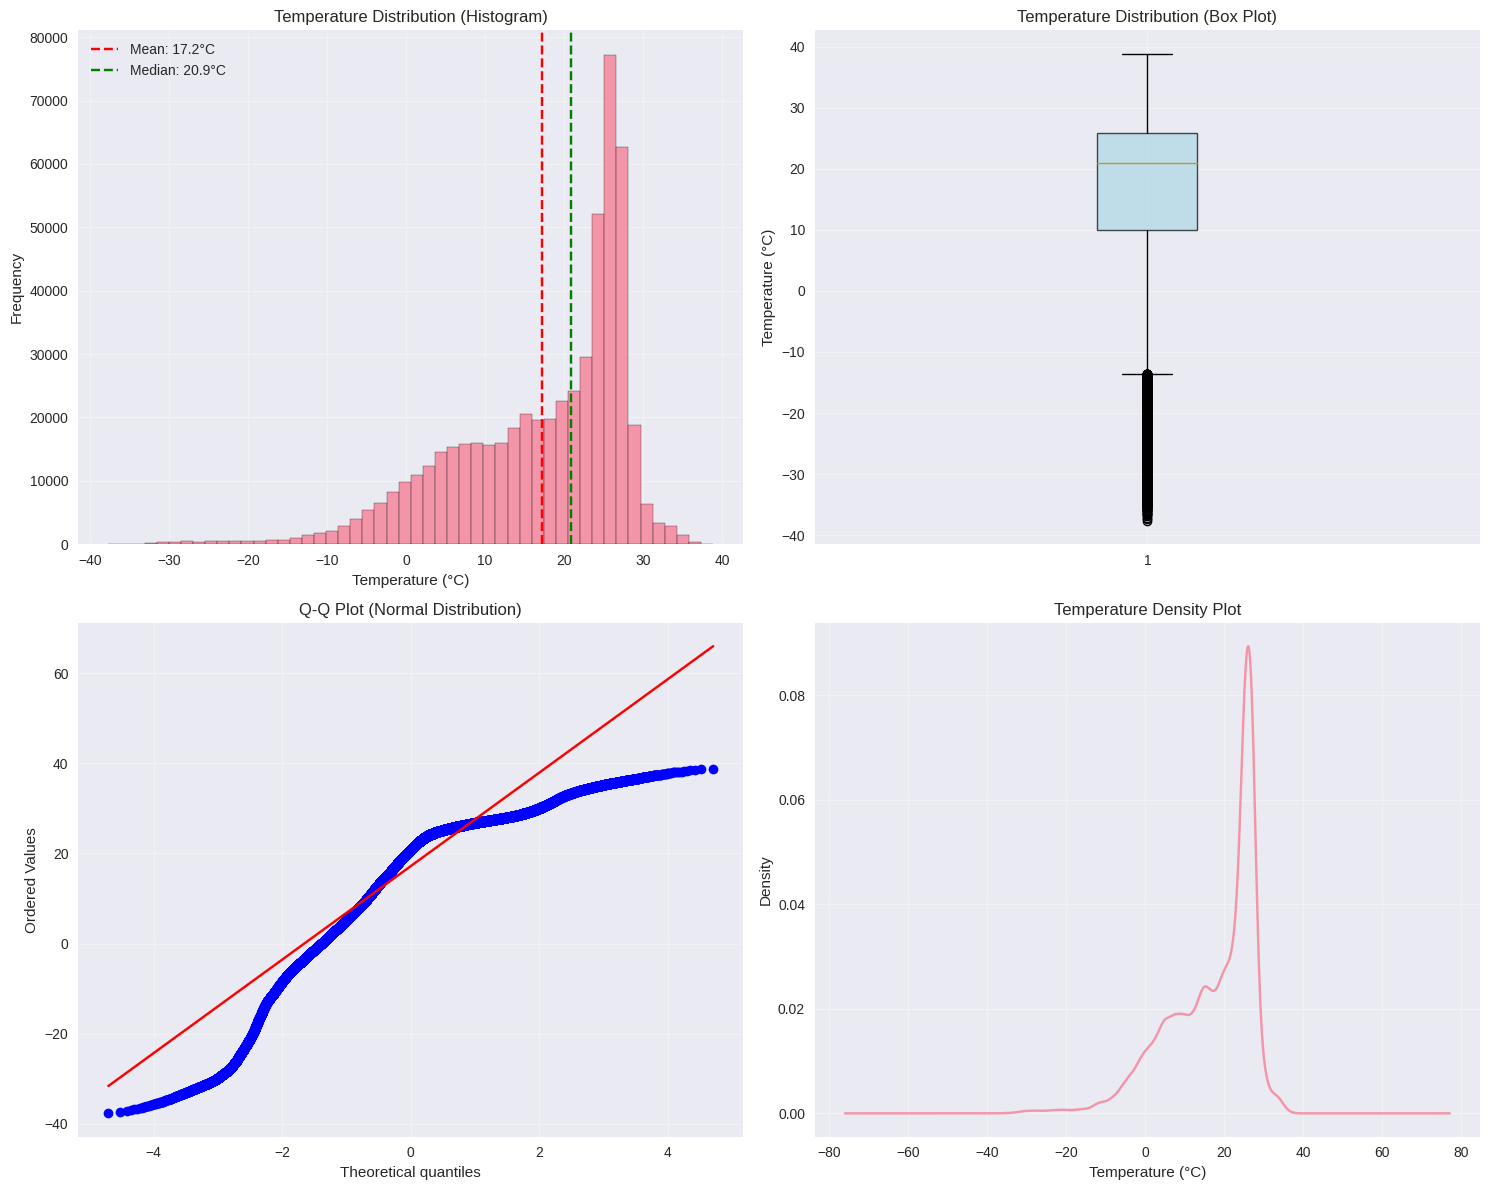

In [6]:

print("="*60)
print("TEMPERATURE DISTRIBUTION ANALYSIS")
print("="*60)

if 'AverageTemperature' in df.columns:
    temp_data = df['AverageTemperature'].dropna()
    
    print("Temperature statistics:")
    print(f"Count: {len(temp_data):,}")
    print(f"Mean: {temp_data.mean():.3f}°C")
    print(f"Median: {temp_data.median():.3f}°C")
    print(f"Mode: {temp_data.mode().iloc[0]:.3f}°C")
    print(f"Standard Deviation: {temp_data.std():.3f}°C")
    print(f"Range: {temp_data.max() - temp_data.min():.3f}°C")
    print(f"IQR: {temp_data.quantile(0.75) - temp_data.quantile(0.25):.3f}°C")

# Create subplots for temperature distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(temp_data, bins=50, alpha=0.7, edgecolor='black')
axes[0,0].axvline(temp_data.mean(), color='red', linestyle='--', label=f'Mean: {temp_data.mean():.1f}°C')
axes[0,0].axvline(temp_data.median(), color='green', linestyle='--', label=f'Median: {temp_data.median():.1f}°C')
axes[0,0].set_title('Temperature Distribution (Histogram)')
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(temp_data, vert=True, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0,1].set_title('Temperature Distribution (Box Plot)')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(temp_data, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normal Distribution)')
axes[1,0].grid(True, alpha=0.3)

# Density plot
temp_data.plot(kind='density', ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Temperature Density Plot')
axes[1,1].set_xlabel('Temperature (°C)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Country-wise Analysis

Geographic analysis examining:
- Countries with the most temperature data
- Average temperatures by country
- Identification of hottest and coldest countries
- Data availability across different nations

This provides insights into global temperature variations and data coverage.

COUNTRY-WISE ANALYSIS
Top 15 countries by data points:
Country
Åland                        3239
Faroe Islands                3239
Greece                       3239
Germany                      3239
Saint Pierre And Miquelon    3239
France                       3239
France (Europe)              3239
Finland                      3239
San Marino                   3239
Europe                       3239
Switzerland                  3239
Estonia                      3239
Slovakia                     3239
Slovenia                     3239
Spain                        3239
Name: count, dtype: int64

Total unique countries: 243

Countries with complete temperature data (top 10):
Country
Åland                   3166
Bulgaria                3166
Romania                 3166
Poland                  3166
Norway                  3166
Netherlands (Europe)    3166
Guernsey                3166
Montenegro              3166
Monaco                  3166
Moldova                 3166
Name: AverageTemperatu

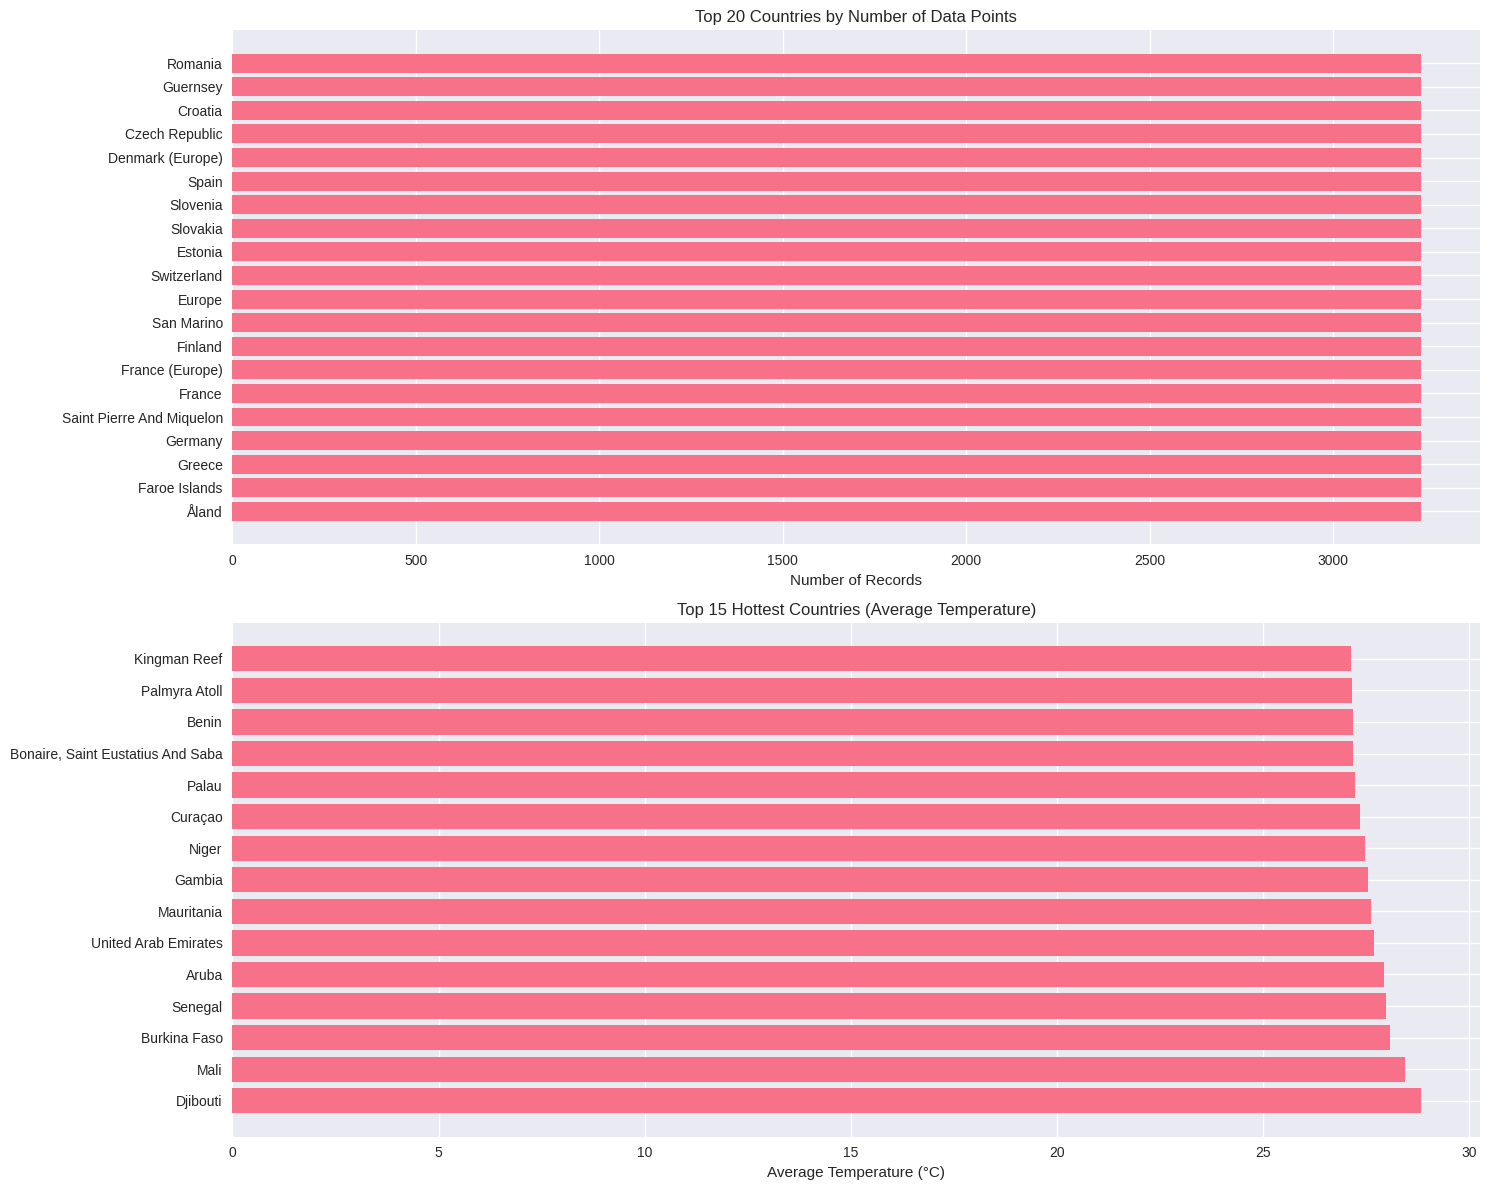

In [7]:

print("="*60)
print("COUNTRY-WISE ANALYSIS")
print("="*60)

if 'Country' in df.columns:
    # Countries with most data points
    country_counts = df['Country'].value_counts()
    print("Top 15 countries by data points:")
    print(country_counts.head(15))
    
    print(f"\nTotal unique countries: {df['Country'].nunique()}")
    
    # Countries with complete temperature data
    complete_temp_by_country = df.groupby('Country')['AverageTemperature'].count().sort_values(ascending=False)
    print(f"\nCountries with complete temperature data (top 10):")
    print(complete_temp_by_country.head(10))
    
    # Average temperature by country
    avg_temp_by_country = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False)
    print(f"\nHottest countries (average temperature):")
    print(avg_temp_by_country.head(10).round(2))
    
    print(f"\nColdest countries (average temperature):")
    print(avg_temp_by_country.tail(10).round(2))

# Visualizations
if 'Country' in df.columns and 'AverageTemperature' in df.columns:
    # Top 20 countries by data points
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    top_countries = country_counts.head(20)
    axes[0].barh(range(len(top_countries)), top_countries.values)
    axes[0].set_yticks(range(len(top_countries)))
    axes[0].set_yticklabels(top_countries.index)
    axes[0].set_title('Top 20 Countries by Number of Data Points')
    axes[0].set_xlabel('Number of Records')
    
    # Average temperature by top countries
    top_countries_temp = avg_temp_by_country.head(15)
    axes[1].barh(range(len(top_countries_temp)), top_countries_temp.values)
    axes[1].set_yticks(range(len(top_countries_temp)))
    axes[1].set_yticklabels(top_countries_temp.index)
    axes[1].set_title('Top 15 Hottest Countries (Average Temperature)')
    axes[1].set_xlabel('Average Temperature (°C)')
    
    plt.tight_layout()
    plt.show()


## 8. Temporal Analysis

Time-based analysis covering:
- Long-term temperature trends over years
- Monthly and seasonal patterns
- Decade-wise temperature changes
- Temporal data quality and completeness

Understanding how temperatures have changed over time and identifying cyclical patterns.

TEMPORAL ANALYSIS
Time range: 1743-11-01 to 2013-09-01
Total time span: 98555 days
Years covered: 271

Yearly statistics (first 10 years):
      Record_Count  Avg_Temp  Temp_Std  Countries
year                                             
1743            50     5.184     3.666         50
1744           400     9.838     6.174         50
1745           200     1.387     5.478         50
1746             0       NaN       NaN         50
1747             0       NaN       NaN         50
1748             0       NaN       NaN         50
1749             0       NaN       NaN         50
1750           550     9.129     7.501         50
1751           400     9.167     8.563         50
1752           300     4.413     5.126         50

Yearly statistics (last 10 years):
      Record_Count  Avg_Temp  Temp_Std  Countries
year                                             
2004          2904    19.422    10.356        243
2005          2904    19.500    10.510        243
2006          2904    19.

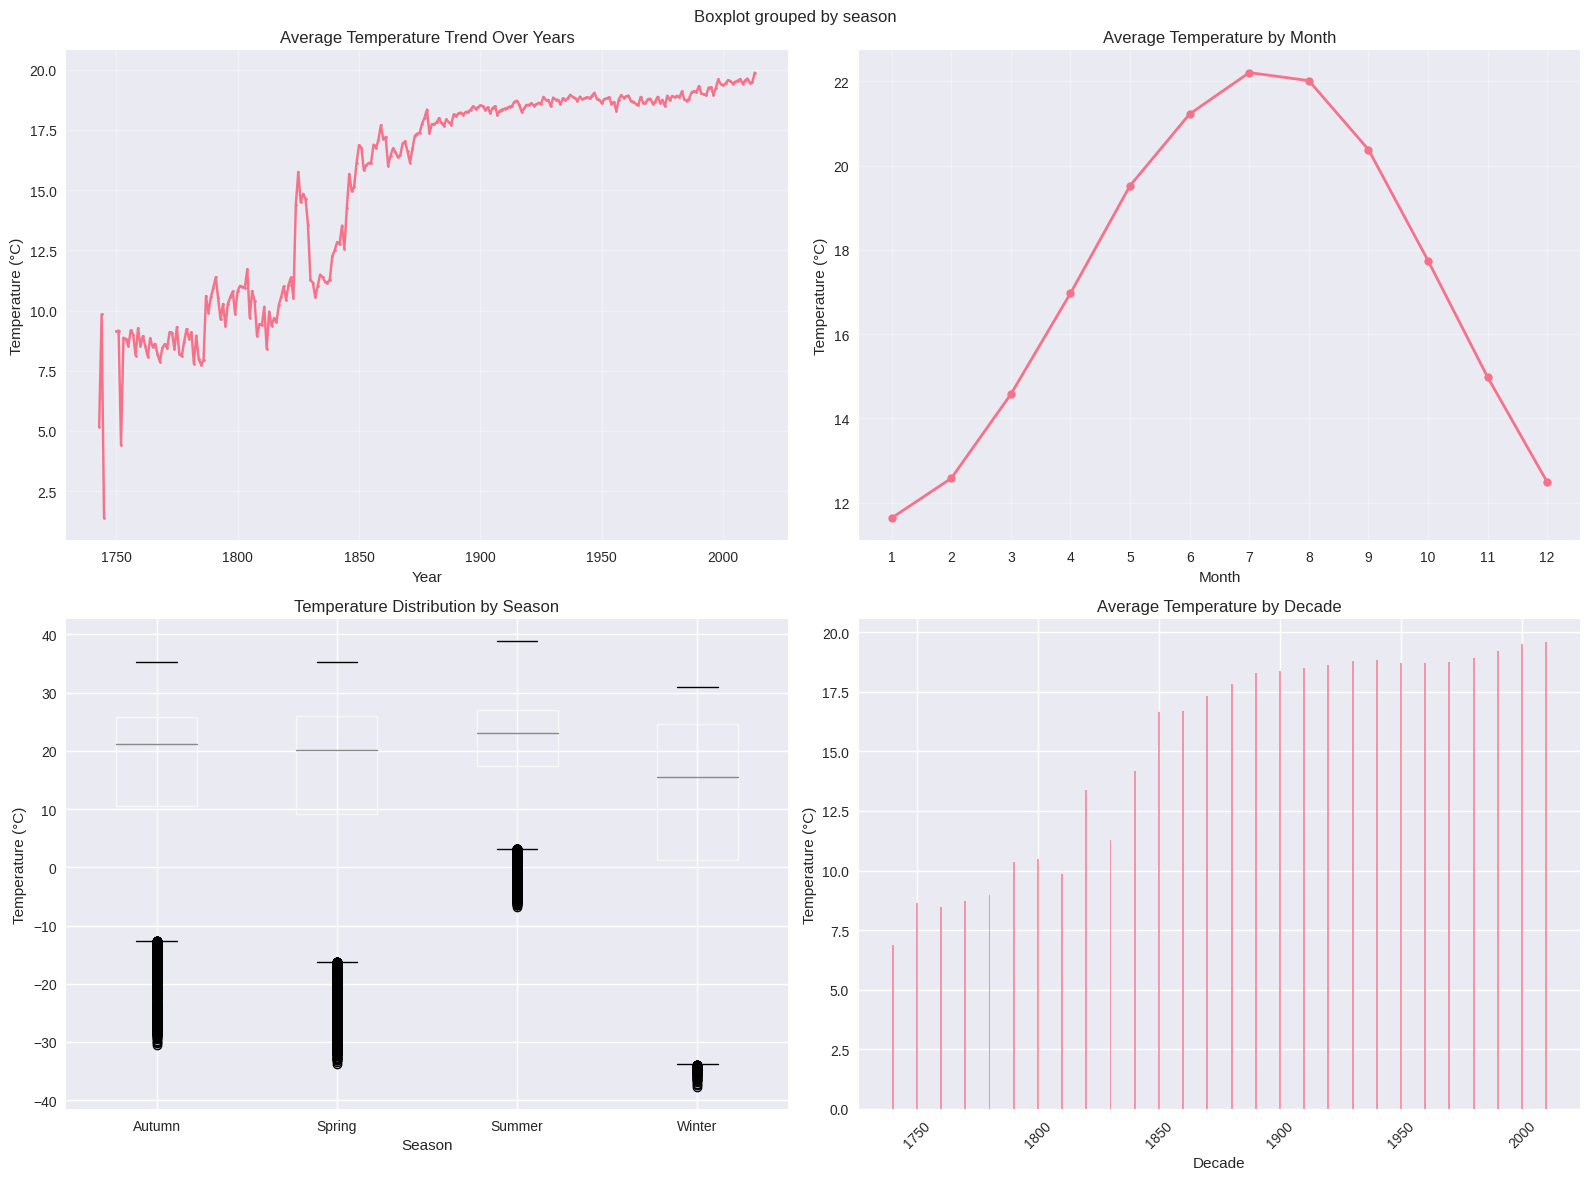

In [8]:

print("="*60)
print("TEMPORAL ANALYSIS")
print("="*60)

if 'dt' in df.columns:
    # Time range
    print(f"Time range: {df['dt'].min().strftime('%Y-%m-%d')} to {df['dt'].max().strftime('%Y-%m-%d')}")
    print(f"Total time span: {(df['dt'].max() - df['dt'].min()).days} days")
    print(f"Years covered: {df['dt'].dt.year.max() - df['dt'].dt.year.min() + 1}")
    
    # Yearly analysis
    if 'year' in df.columns:
        yearly_stats = df.groupby('year').agg({
            'AverageTemperature': ['count', 'mean', 'std'],
            'Country': 'nunique'
        }).round(3)
        
        yearly_stats.columns = ['Record_Count', 'Avg_Temp', 'Temp_Std', 'Countries']
        print("\nYearly statistics (first 10 years):")
        print(yearly_stats.head(10))
        
        print(f"\nYearly statistics (last 10 years):")
        print(yearly_stats.tail(10))

# Monthly and Seasonal Analysis
if 'month' in df.columns and 'AverageTemperature' in df.columns:
    monthly_temp = df.groupby('month')['AverageTemperature'].agg(['mean', 'std', 'count']).round(3)
    monthly_temp['month_name'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    print(f"\nMonthly temperature statistics:")
    print(monthly_temp)

if 'season' in df.columns:
    seasonal_temp = df.groupby('season')['AverageTemperature'].agg(['mean', 'std', 'count']).round(3)
    print(f"\nSeasonal temperature statistics:")
    print(seasonal_temp)

# Temporal visualizations
if 'year' in df.columns and 'AverageTemperature' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Yearly trend
    yearly_avg = df.groupby('year')['AverageTemperature'].mean()
    axes[0,0].plot(yearly_avg.index, yearly_avg.values, marker='o', markersize=2)
    axes[0,0].set_title('Average Temperature Trend Over Years')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Temperature (°C)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Monthly pattern
    if 'month' in df.columns:
        monthly_avg = df.groupby('month')['AverageTemperature'].mean()
        axes[0,1].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=6)
        axes[0,1].set_title('Average Temperature by Month')
        axes[0,1].set_xlabel('Month')
        axes[0,1].set_ylabel('Temperature (°C)')
        axes[0,1].set_xticks(range(1, 13))
        axes[0,1].grid(True, alpha=0.3)
    
    # Seasonal boxplot
    if 'season' in df.columns:
        df.boxplot(column='AverageTemperature', by='season', ax=axes[1,0])
        axes[1,0].set_title('Temperature Distribution by Season')
        axes[1,0].set_xlabel('Season')
        axes[1,0].set_ylabel('Temperature (°C)')
        
    # Decade analysis
    if 'year' in df.columns:
        df['decade'] = (df['year'] // 10) * 10
        decade_avg = df.groupby('decade')['AverageTemperature'].mean()
        axes[1,1].bar(decade_avg.index, decade_avg.values, alpha=0.7)
        axes[1,1].set_title('Average Temperature by Decade')
        axes[1,1].set_xlabel('Decade')
        axes[1,1].set_ylabel('Temperature (°C)')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


## 9. Correlation Analysis

Statistical relationships between variables:
- Correlation matrix for all numerical variables
- Identification of strong correlations
- Heatmap visualization
- Scatter plots for key relationships

Understanding how different variables relate to each other.

CORRELATION ANALYSIS
Correlation matrix:
                               AverageTemperature  \
AverageTemperature                          1.000   
AverageTemperatureUncertainty              -0.305   
year                                        0.237   
month                                       0.087   
decade                                      0.236   

                               AverageTemperatureUncertainty   year  month  \
AverageTemperature                                    -0.305  0.237  0.087   
AverageTemperatureUncertainty                          1.000 -0.737 -0.030   
year                                                  -0.737  1.000 -0.004   
month                                                 -0.030 -0.004  1.000   
decade                                                -0.737  0.999 -0.004   

                               decade  
AverageTemperature              0.236  
AverageTemperatureUncertainty  -0.737  
year                            0.999  
month      

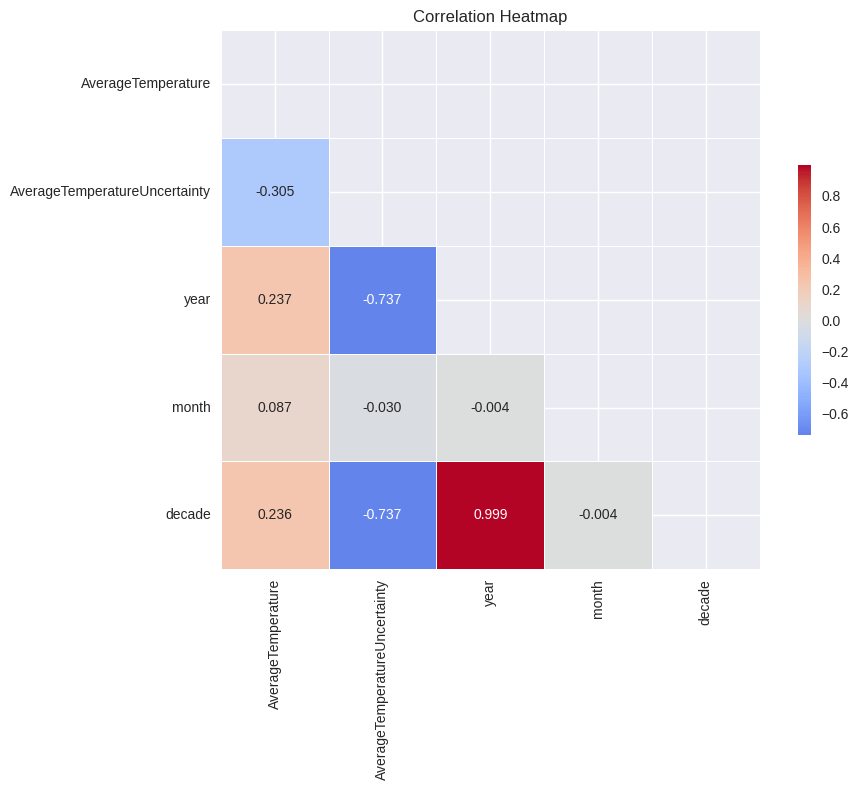

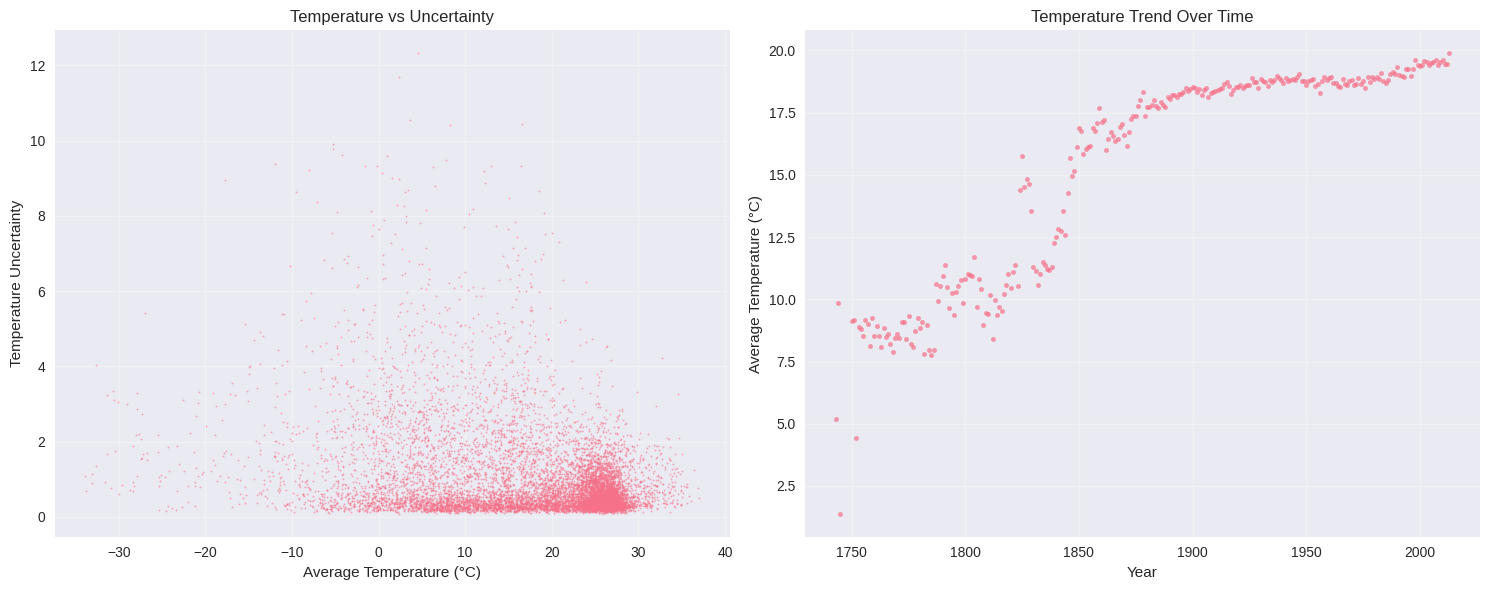

In [9]:

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

print("Correlation matrix:")
print(correlation_matrix.round(3))

# Find strong correlations
threshold = 0.5
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            strong_correlations.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    print(f"\nStrong correlations (|r| > {threshold}):")
    print(strong_corr_df.round(3))

# Correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.3f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Scatter plots for key relationships
if 'AverageTemperature' in df.columns and 'AverageTemperatureUncertainty' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Temperature vs Uncertainty
    sample_data = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty']).sample(min(10000, len(df)))
    axes[0].scatter(sample_data['AverageTemperature'], 
                   sample_data['AverageTemperatureUncertainty'], 
                   alpha=0.5, s=1)
    axes[0].set_xlabel('Average Temperature (°C)')
    axes[0].set_ylabel('Temperature Uncertainty')
    axes[0].set_title('Temperature vs Uncertainty')
    axes[0].grid(True, alpha=0.3)
    
    # Temperature vs Year (if available)
    if 'year' in df.columns:
        yearly_temp = df.groupby('year')['AverageTemperature'].mean().reset_index()
        axes[1].scatter(yearly_temp['year'], yearly_temp['AverageTemperature'], alpha=0.7, s=10)
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Average Temperature (°C)')
        axes[1].set_title('Temperature Trend Over Time')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 10. Outlier Detection and Analysis

Comprehensive outlier analysis using multiple methods:
- **IQR Method**: Identifying values beyond 1.5 * IQR from quartiles
- **Z-Score Method**: Detecting values more than 3 standard deviations from mean
- **Visualization**: Box plots and scatter plots highlighting outliers

Understanding extreme temperature values and their patterns across countries and time.

OUTLIER DETECTION AND ANALYSIS
Temperature outliers (IQR method):
Lower bound: -13.658°C
Upper bound: 49.498°C
Number of outliers: 6438
Percentage of outliers: 1.18%
Outlier temperature range: -37.7°C to -13.7°C

Countries with most temperature outliers:
Country
Greenland                 1351
Denmark                   1341
Russia                     962
Canada                     844
Svalbard And Jan Mayen     820
Mongolia                   603
Kazakhstan                 186
Finland                    122
Kyrgyzstan                  80
Sweden                      24
Name: count, dtype: int64

Z-score outliers (threshold=3): 5439

Uncertainty outliers (IQR method): 48315
Uncertainty bounds: -1.002 to 2.530


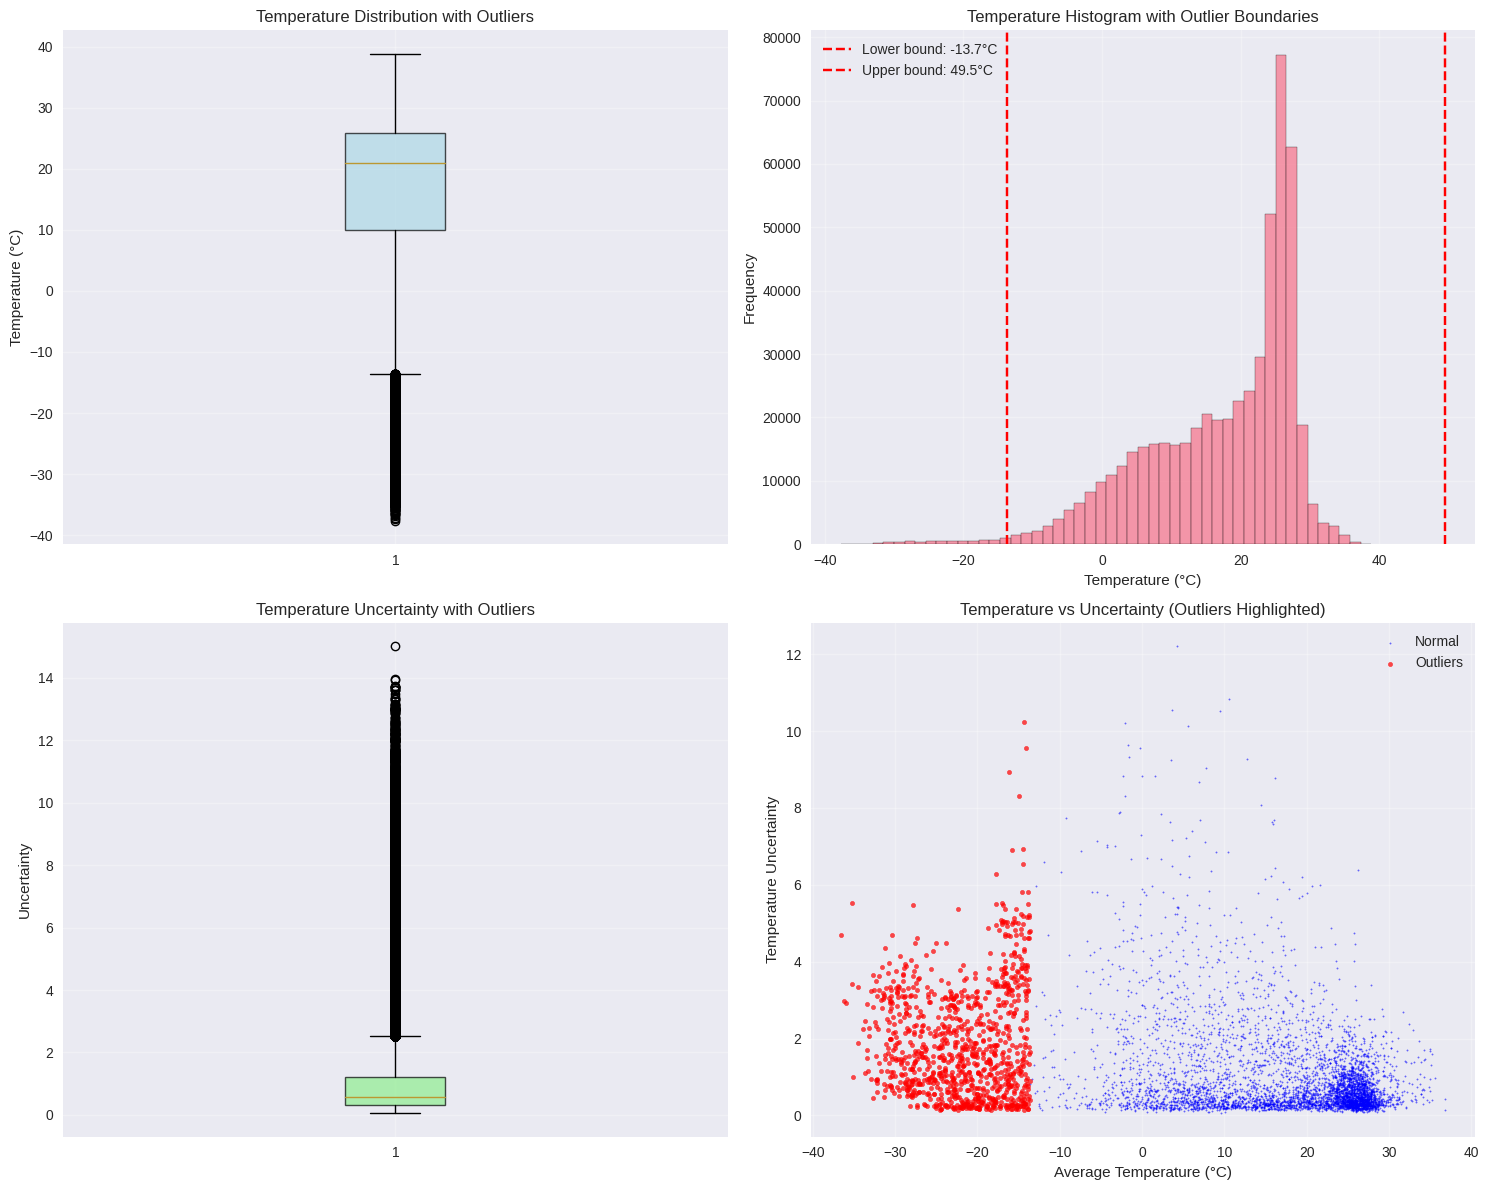

In [10]:

print("="*60)
print("OUTLIER DETECTION AND ANALYSIS")
print("="*60)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    return outliers

# Outlier analysis for temperature
if 'AverageTemperature' in df.columns:
    temp_data_clean = df.dropna(subset=['AverageTemperature'])
    
    # IQR method
    temp_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(temp_data_clean, 'AverageTemperature')
    print(f"Temperature outliers (IQR method):")
    print(f"Lower bound: {lower_bound:.3f}°C")
    print(f"Upper bound: {upper_bound:.3f}°C")
    print(f"Number of outliers: {len(temp_outliers_iqr)}")
    print(f"Percentage of outliers: {(len(temp_outliers_iqr)/len(temp_data_clean))*100:.2f}%")
    
    if len(temp_outliers_iqr) > 0:
        print(f"Outlier temperature range: {temp_outliers_iqr['AverageTemperature'].min():.1f}°C to {temp_outliers_iqr['AverageTemperature'].max():.1f}°C")
        
        # Countries with most outliers
        if 'Country' in df.columns:
            outlier_countries = temp_outliers_iqr['Country'].value_counts().head(10)
            print(f"\nCountries with most temperature outliers:")
            print(outlier_countries)
    
    # Z-score method
    temp_outliers_zscore = detect_outliers_zscore(temp_data_clean, 'AverageTemperature')
    print(f"\nZ-score outliers (threshold=3): {len(temp_outliers_zscore)}")

# Outlier analysis for uncertainty
if 'AverageTemperatureUncertainty' in df.columns:
    uncertainty_data_clean = df.dropna(subset=['AverageTemperatureUncertainty'])
    uncertainty_outliers_iqr, unc_lower, unc_upper = detect_outliers_iqr(uncertainty_data_clean, 'AverageTemperatureUncertainty')
    print(f"\nUncertainty outliers (IQR method): {len(uncertainty_outliers_iqr)}")
    print(f"Uncertainty bounds: {unc_lower:.3f} to {unc_upper:.3f}")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if 'AverageTemperature' in df.columns:
    # Box plot with outliers
    axes[0,0].boxplot(temp_data_clean['AverageTemperature'], patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[0,0].set_title('Temperature Distribution with Outliers')
    axes[0,0].set_ylabel('Temperature (°C)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Histogram with outlier boundaries
    axes[0,1].hist(temp_data_clean['AverageTemperature'], bins=50, alpha=0.7, edgecolor='black')
    axes[0,1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.1f}°C')
    axes[0,1].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.1f}°C')
    axes[0,1].set_title('Temperature Histogram with Outlier Boundaries')
    axes[0,1].set_xlabel('Temperature (°C)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

if 'AverageTemperatureUncertainty' in df.columns:
    # Uncertainty outliers
    axes[1,0].boxplot(uncertainty_data_clean['AverageTemperatureUncertainty'], patch_artist=True,
                      boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[1,0].set_title('Temperature Uncertainty with Outliers')
    axes[1,0].set_ylabel('Uncertainty')
    axes[1,0].grid(True, alpha=0.3)

# Scatter plot highlighting outliers
if 'AverageTemperature' in df.columns and 'AverageTemperatureUncertainty' in df.columns:
    sample_normal = temp_data_clean[~temp_data_clean.index.isin(temp_outliers_iqr.index)].sample(min(5000, len(temp_data_clean)))
    sample_outliers = temp_outliers_iqr.sample(min(1000, len(temp_outliers_iqr))) if len(temp_outliers_iqr) > 0 else pd.DataFrame()
    
    axes[1,1].scatter(sample_normal['AverageTemperature'], sample_normal['AverageTemperatureUncertainty'], 
                     alpha=0.5, s=1, label='Normal', color='blue')
    if len(sample_outliers) > 0:
        axes[1,1].scatter(sample_outliers['AverageTemperature'], sample_outliers['AverageTemperatureUncertainty'], 
                         alpha=0.7, s=10, label='Outliers', color='red')
    axes[1,1].set_xlabel('Average Temperature (°C)')
    axes[1,1].set_ylabel('Temperature Uncertainty')
    axes[1,1].set_title('Temperature vs Uncertainty (Outliers Highlighted)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Geographic and Climate Zone Analysis

Climate classification and geographic patterns:
- **Climate Zone Classification**: Based on average temperature ranges
  - Polar (< 0°C)
  - Cold (0-10°C)
  - Temperate (10-20°C)
  - Warm (20-30°C)
  - Hot (> 30°C)
- **Regional Analysis**: Temperature variations by climate zones
- **Country Rankings**: Temperature ranges and geographic diversity

This analysis helps understand global climate patterns and regional variations.

GEOGRAPHIC AND CLIMATE ZONE ANALYSIS
Countries by average temperature (top 15):
                                   avg_temp  temp_std  record_count  \
Country                                                               
Djibouti                             28.817     3.139          1658   
Mali                                 28.442     4.230          1878   
Burkina Faso                         28.084     2.266          1849   
Senegal                              27.967     2.162          1872   
Aruba                                27.920     1.391          2086   
United Arab Emirates                 27.694     6.182          1887   
Mauritania                           27.620     4.919          1953   
Gambia                               27.539     1.802          1872   
Niger                                27.459     4.764          1748   
Curaçao                              27.353     1.247          2086   
Palau                                27.216     0.544          1558 

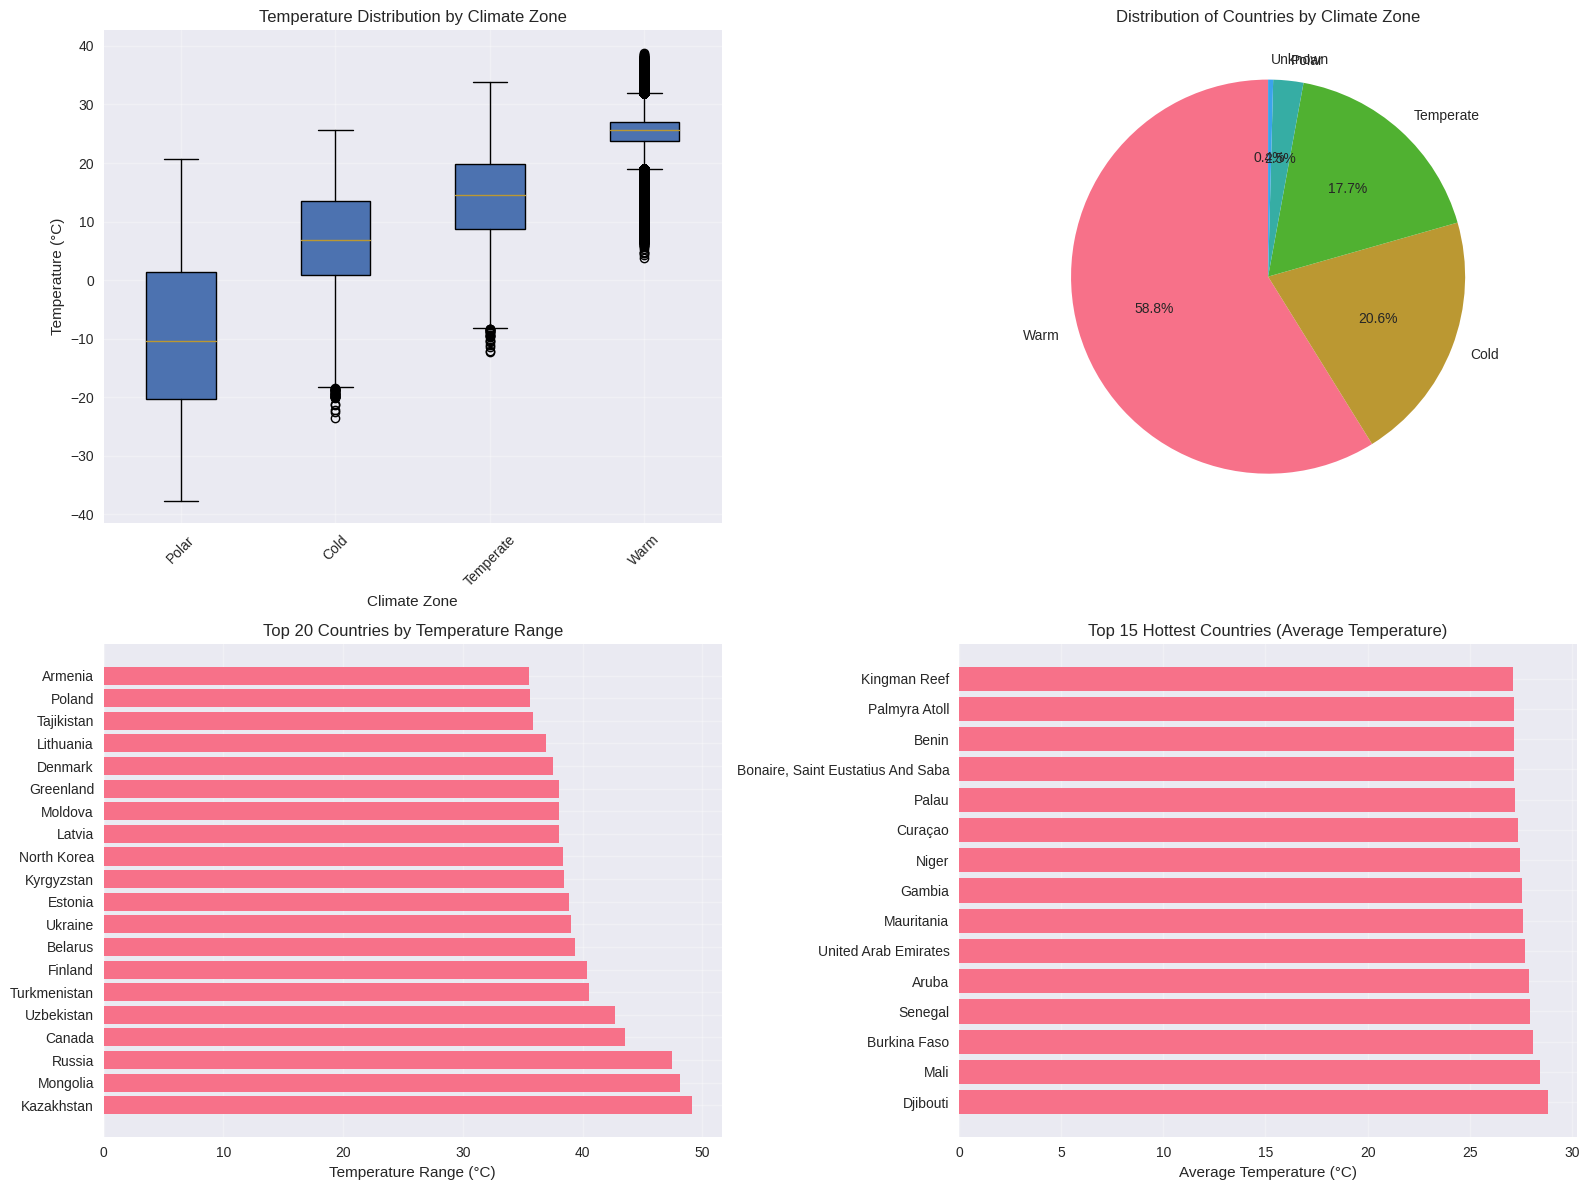

In [11]:

print("="*60)
print("GEOGRAPHIC AND CLIMATE ZONE ANALYSIS")
print("="*60)

if 'Country' in df.columns and 'AverageTemperature' in df.columns:
    # Define climate zones based on temperature
    def classify_climate_zone(temp):
        if pd.isna(temp):
            return 'Unknown'
        elif temp < 0:
            return 'Polar'
        elif temp < 10:
            return 'Cold'
        elif temp < 20:
            return 'Temperate'
        elif temp < 30:
            return 'Warm'
        else:
            return 'Hot'
    
    # Calculate average temperature by country
    country_avg_temp = df.groupby('Country')['AverageTemperature'].agg(['mean', 'std', 'count']).round(3)
    country_avg_temp.columns = ['avg_temp', 'temp_std', 'record_count']
    country_avg_temp = country_avg_temp.sort_values('avg_temp', ascending=False)
    
    # Add climate zones
    country_avg_temp['climate_zone'] = country_avg_temp['avg_temp'].apply(classify_climate_zone)
    
    print("Countries by average temperature (top 15):")
    print(country_avg_temp.head(15))
    
    print("\nCountries by average temperature (bottom 15):")
    print(country_avg_temp.tail(15))
    
    # Climate zone distribution
    climate_distribution = country_avg_temp['climate_zone'].value_counts()
    print(f"\nClimate zone distribution:")
    print(climate_distribution)
    
    # Statistics by climate zone
    climate_stats = country_avg_temp.groupby('climate_zone').agg({
        'avg_temp': ['mean', 'std', 'min', 'max', 'count'],
        'record_count': ['mean', 'sum']
    }).round(3)
    
    print(f"\nStatistics by climate zone:")
    print(climate_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Temperature distribution by climate zone
if 'Country' in df.columns:
    # Add climate zone to main dataframe
    country_climate_map = country_avg_temp['climate_zone'].to_dict()
    df['climate_zone'] = df['Country'].map(country_climate_map)
    
    # Box plot by climate zone
    climate_temp_data = df.dropna(subset=['AverageTemperature', 'climate_zone'])
    climate_zones = climate_temp_data['climate_zone'].unique()
    climate_zones = [zone for zone in ['Polar', 'Cold', 'Temperate', 'Warm', 'Hot'] if zone in climate_zones]
    
    climate_data = [climate_temp_data[climate_temp_data['climate_zone'] == zone]['AverageTemperature'].values 
                    for zone in climate_zones]
    
    axes[0,0].boxplot(climate_data, labels=climate_zones, patch_artist=True)
    axes[0,0].set_title('Temperature Distribution by Climate Zone')
    axes[0,0].set_xlabel('Climate Zone')
    axes[0,0].set_ylabel('Temperature (°C)')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)

# Climate zone pie chart
climate_distribution.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Countries by Climate Zone')
axes[0,1].set_ylabel('')

# Temperature range by country (top 20)
country_temp_range = df.groupby('Country')['AverageTemperature'].agg(['min', 'max']).dropna()
country_temp_range['range'] = country_temp_range['max'] - country_temp_range['min']
top_range_countries = country_temp_range.nlargest(20, 'range')

y_pos = np.arange(len(top_range_countries))
axes[1,0].barh(y_pos, top_range_countries['range'])
axes[1,0].set_yticks(y_pos)
axes[1,0].set_yticklabels(top_range_countries.index)
axes[1,0].set_title('Top 20 Countries by Temperature Range')
axes[1,0].set_xlabel('Temperature Range (°C)')
axes[1,0].grid(True, alpha=0.3)

# Average temperature by top 15 hottest countries
hottest_countries = country_avg_temp.head(15)
y_pos = np.arange(len(hottest_countries))
axes[1,1].barh(y_pos, hottest_countries['avg_temp'])
axes[1,1].set_yticks(y_pos)
axes[1,1].set_yticklabels(hottest_countries.index)
axes[1,1].set_title('Top 15 Hottest Countries (Average Temperature)')
axes[1,1].set_xlabel('Average Temperature (°C)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 12. Advanced Statistical Analysis

Deep statistical examination including:
- **Normality Tests**: Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera
- **Distribution Fitting**: Testing multiple probability distributions
- **Statistical Inference**: Understanding the underlying data distribution

This section provides rigorous statistical foundation for further analysis.

In [12]:

print("="*60)
print("ADVANCED STATISTICAL ANALYSIS")
print("="*60)

if 'AverageTemperature' in df.columns:
    temp_data = df['AverageTemperature'].dropna()
    
    # Normality tests
    print("NORMALITY TESTS:")
    
    # Shapiro-Wilk test (sample if data is too large)
    sample_size = min(5000, len(temp_data))
    temp_sample = temp_data.sample(sample_size)
    
    shapiro_stat, shapiro_p = stats.shapiro(temp_sample)
    print(f"Shapiro-Wilk test (n={sample_size}):")
    print(f"  Statistic: {shapiro_stat:.6f}")
    print(f"  P-value: {shapiro_p:.6f}")
    print(f"  Normal distribution: {'Yes' if shapiro_p > 0.05 else 'No'}")
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = stats.kstest(temp_sample, 'norm', args=(temp_sample.mean(), temp_sample.std()))
    print(f"\nKolmogorov-Smirnov test:")
    print(f"  Statistic: {ks_stat:.6f}")
    print(f"  P-value: {ks_p:.6f}")
    print(f"  Normal distribution: {'Yes' if ks_p > 0.05 else 'No'}")
    
    # Anderson-Darling test
    ad_stat, ad_critical, ad_significance = stats.anderson(temp_sample, dist='norm')
    print(f"\nAnderson-Darling test:")
    print(f"  Statistic: {ad_stat:.6f}")
    print(f"  Critical values: {ad_critical}")
    print(f"  Significance levels: {ad_significance}")
    
    # Jarque-Bera test
    jb_stat, jb_p = stats.jarque_bera(temp_sample)
    print(f"\nJarque-Bera test:")
    print(f"  Statistic: {jb_stat:.6f}")
    print(f"  P-value: {jb_p:.6f}")
    print(f"  Normal distribution: {'Yes' if jb_p > 0.05 else 'No'}")

# Distribution fitting
print(f"\nDISTRIBUTION FITTING:")

# Try different distributions
distributions = [stats.norm, stats.skewnorm, stats.lognorm, stats.gamma, stats.beta]
distribution_names = ['Normal', 'Skew Normal', 'Log Normal', 'Gamma', 'Beta']
best_dist = None
best_p = 0
best_name = ""

for dist, name in zip(distributions, distribution_names):
    try:
        # Fit distribution
        params = dist.fit(temp_sample)
        
        # Perform Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(temp_sample, dist.cdf, args=params)
        
        print(f"{name}: KS statistic = {ks_stat:.6f}, p-value = {p_value:.6f}")
        
        if p_value > best_p:
            best_dist = dist
            best_p = p_value
            best_name = name
            best_params = params
            
    except Exception as e:
        print(f"{name}: Error - {str(e)}")

print(f"\nBest fitting distribution: {best_name} (p-value: {best_p:.6f})")


ADVANCED STATISTICAL ANALYSIS
NORMALITY TESTS:
Shapiro-Wilk test (n=5000):
  Statistic: 0.893036
  P-value: 0.000000
  Normal distribution: No

Kolmogorov-Smirnov test:
  Statistic: 0.136102
  P-value: 0.000000
  Normal distribution: No

Anderson-Darling test:
  Statistic: 169.645356
  Critical values: [0.576 0.655 0.786 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]

Jarque-Bera test:
  Statistic: 1531.867440
  P-value: 0.000000
  Normal distribution: No

DISTRIBUTION FITTING:
Normal: KS statistic = 0.136117, p-value = 0.000000
Skew Normal: KS statistic = 0.119518, p-value = 0.000000
Log Normal: KS statistic = 0.136177, p-value = 0.000000
Gamma: KS statistic = 0.993868, p-value = 0.000000
Beta: KS statistic = 0.109964, p-value = 0.000000

Best fitting distribution: Beta (p-value: 0.000000)


## 13. Advanced Time Series Analysis

Sophisticated temporal analysis including:
- **Trend Analysis**: Long-term temperature trends using linear regression
- **Seasonality**: Monthly and seasonal decomposition
- **Autocorrelation**: Understanding temporal dependencies
- **Moving Averages**: Smoothing techniques for trend identification

Advanced time series techniques to understand climate patterns over time.

TIME SERIES ANALYSIS (ADVANCED)
Time series data points: 3167
Time range: 1743-11-01 00:00:00 to 2013-09-01 00:00:00
Frequency: None

Time series statistics:
Mean: 15.332°C
Standard deviation: 6.335°C
Autocorrelation (lag 1): 0.913
Autocorrelation (lag 12): 0.972

Trend analysis:
Overall trend slope: 0.004165°C per period
Seasonal decomposition completed
Seasonal component strength: 4.391
Trend component strength: 4.148
Residual component strength: 1.883


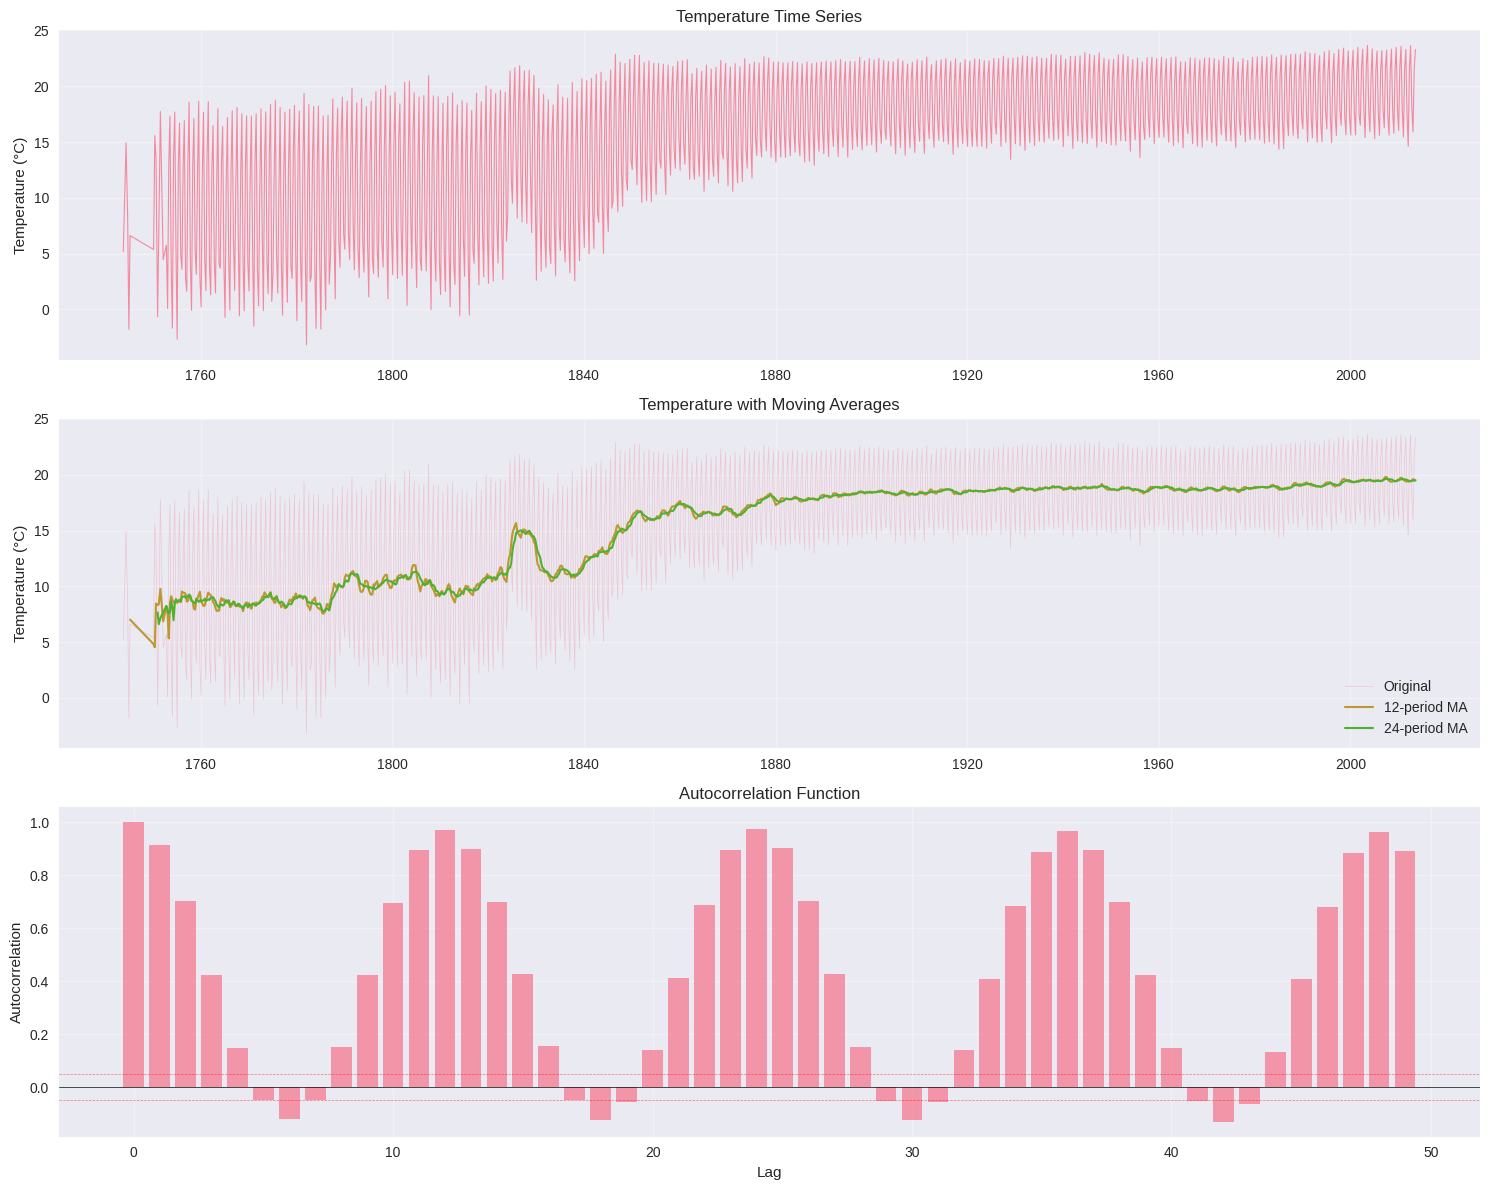

In [13]:

print("="*60)
print("TIME SERIES ANALYSIS (ADVANCED)")
print("="*60)

if 'dt' in df.columns and 'AverageTemperature' in df.columns:
    # Create time series data
    ts_data = df.groupby('dt')['AverageTemperature'].mean().dropna()
    ts_data = ts_data.sort_index()
    
    print(f"Time series data points: {len(ts_data)}")
    print(f"Time range: {ts_data.index.min()} to {ts_data.index.max()}")
    print(f"Frequency: {pd.infer_freq(ts_data.index)}")
    
    # Basic time series statistics
    print(f"\nTime series statistics:")
    print(f"Mean: {ts_data.mean():.3f}°C")
    print(f"Standard deviation: {ts_data.std():.3f}°C")
    print(f"Autocorrelation (lag 1): {ts_data.autocorr(lag=1):.3f}")
    print(f"Autocorrelation (lag 12): {ts_data.autocorr(lag=12):.3f}")
    
    # Trend analysis
    if len(ts_data) > 24:  # Need sufficient data points
        from scipy import signal
        
        # Detrend the data
        detrended = signal.detrend(ts_data.values)
        trend = ts_data.values - detrended
        
        print(f"\nTrend analysis:")
        print(f"Overall trend slope: {np.polyfit(range(len(ts_data)), ts_data.values, 1)[0]:.6f}°C per period")
        
        # Seasonal decomposition (if monthly data)
        if len(ts_data) >= 24:
            try:
                from statsmodels.tsa.seasonal import seasonal_decompose
                
                # Resample to monthly if needed
                if pd.infer_freq(ts_data.index) != 'MS':
                    ts_monthly = ts_data.resample('MS').mean().dropna()
                else:
                    ts_monthly = ts_data
                
                if len(ts_monthly) >= 24:
                    decomposition = seasonal_decompose(ts_monthly, model='additive', period=12)
                    
                    print(f"Seasonal decomposition completed")
                    print(f"Seasonal component strength: {decomposition.seasonal.std():.3f}")
                    print(f"Trend component strength: {decomposition.trend.std():.3f}")
                    print(f"Residual component strength: {decomposition.resid.std():.3f}")
                    
            except ImportError:
                print("Statsmodels not available for seasonal decomposition")
            except Exception as e:
                print(f"Seasonal decomposition error: {e}")

# Time series visualizations
if 'dt' in df.columns and 'AverageTemperature' in df.columns:
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Original time series (sample for performance)
    if len(ts_data) > 1000:
        ts_sample = ts_data.iloc[::max(1, len(ts_data)//1000)]
    else:
        ts_sample = ts_data
    
    axes[0].plot(ts_sample.index, ts_sample.values, linewidth=0.8, alpha=0.8)
    axes[0].set_title('Temperature Time Series')
    axes[0].set_ylabel('Temperature (°C)')
    axes[0].grid(True, alpha=0.3)
    
    # Moving averages
    if len(ts_data) >= 12:
        ma_12 = ts_data.rolling(window=12).mean()
        ma_24 = ts_data.rolling(window=24).mean() if len(ts_data) >= 24 else None
        
        if len(ma_12) > 1000:
            ma_12_sample = ma_12.iloc[::max(1, len(ma_12)//1000)]
        else:
            ma_12_sample = ma_12
            
        axes[1].plot(ts_sample.index, ts_sample.values, alpha=0.3, label='Original', linewidth=0.5)
        axes[1].plot(ma_12_sample.index, ma_12_sample.values, label='12-period MA', linewidth=1.5)
        
        if ma_24 is not None:
            if len(ma_24) > 1000:
                ma_24_sample = ma_24.iloc[::max(1, len(ma_24)//1000)]
            else:
                ma_24_sample = ma_24
            axes[1].plot(ma_24_sample.index, ma_24_sample.values, label='24-period MA', linewidth=1.5)
        
        axes[1].set_title('Temperature with Moving Averages')
        axes[1].set_ylabel('Temperature (°C)')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    # Autocorrelation plot
    if len(ts_data) > 50:
        lags = min(50, len(ts_data)//4)
        autocorr_values = [ts_data.autocorr(lag=i) for i in range(lags)]
        
        axes[2].bar(range(lags), autocorr_values, alpha=0.7)
        axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[2].axhline(y=0.05, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
        axes[2].axhline(y=-0.05, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
        axes[2].set_title('Autocorrelation Function')
        axes[2].set_xlabel('Lag')
        axes[2].set_ylabel('Autocorrelation')
        axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 14. Uncertainty Analysis

Comprehensive analysis of temperature measurement uncertainty:
- **Uncertainty Statistics**: Distribution and patterns of measurement uncertainty
- **Temporal Trends**: How uncertainty has changed over time
- **Geographic Patterns**: Countries with highest/lowest uncertainty
- **Relationship Analysis**: Correlation between temperature and uncertainty

Understanding the reliability and precision of temperature measurements.

UNCERTAINTY ANALYSIS
Temperature Uncertainty Statistics:
Count: 545,550
Mean: 1.019
Median: 0.571
Standard Deviation: 1.202
Min: 0.052
Max: 15.003
Range: 14.951

Countries with highest average uncertainty:
                        avg_uncertainty  uncertainty_std  count
Country                                                        
Svalbard And Jan Mayen            2.976            1.720   3008
Greenland                         1.823            1.033   2288
Denmark                           1.774            1.008   2288
Norway                            1.758            1.793   3166
Iceland                           1.740            1.530   3166
Åland                             1.726            1.984   3166
Liechtenstein                     1.673            1.965   3166
Finland                           1.645            1.837   3166
Denmark (Europe)                  1.637            2.075   3166
Sweden                            1.637            1.965   3166

Countries with lowest ave

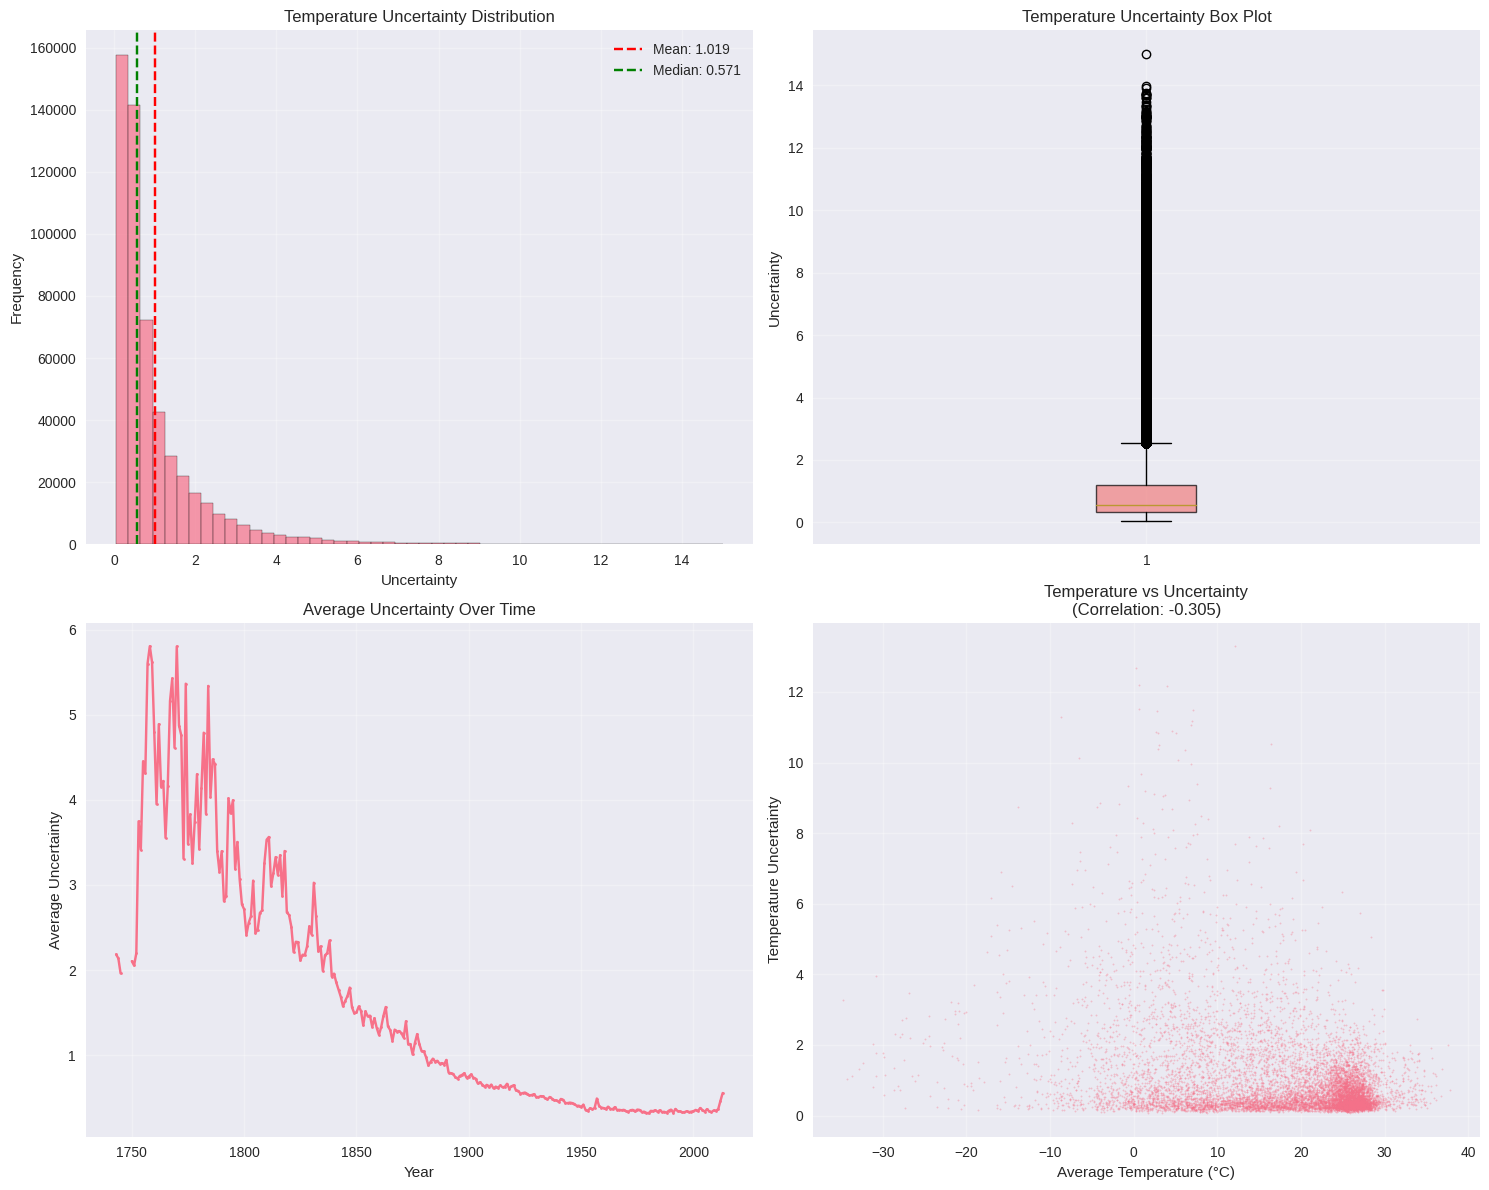

In [14]:

print("="*60)
print("UNCERTAINTY ANALYSIS")
print("="*60)

if 'AverageTemperatureUncertainty' in df.columns:
    uncertainty_data = df['AverageTemperatureUncertainty'].dropna()
    
    print("Temperature Uncertainty Statistics:")
    print(f"Count: {len(uncertainty_data):,}")
    print(f"Mean: {uncertainty_data.mean():.3f}")
    print(f"Median: {uncertainty_data.median():.3f}")
    print(f"Standard Deviation: {uncertainty_data.std():.3f}")
    print(f"Min: {uncertainty_data.min():.3f}")
    print(f"Max: {uncertainty_data.max():.3f}")
    print(f"Range: {uncertainty_data.max() - uncertainty_data.min():.3f}")
    
    # Uncertainty by country
    if 'Country' in df.columns:
        country_uncertainty = df.groupby('Country')['AverageTemperatureUncertainty'].agg(['mean', 'std', 'count']).round(3)
        country_uncertainty.columns = ['avg_uncertainty', 'uncertainty_std', 'count']
        country_uncertainty = country_uncertainty.sort_values('avg_uncertainty', ascending=False)
        
        print(f"\nCountries with highest average uncertainty:")
        print(country_uncertainty.head(10))
        
        print(f"\nCountries with lowest average uncertainty:")
        print(country_uncertainty.tail(10))
    
    # Uncertainty over time
    if 'year' in df.columns:
        yearly_uncertainty = df.groupby('year')['AverageTemperatureUncertainty'].agg(['mean', 'std', 'count']).round(3)
        yearly_uncertainty.columns = ['avg_uncertainty', 'uncertainty_std', 'count']
        
        print(f"\nUncertainty trends over time (first 10 years):")
        print(yearly_uncertainty.head(10))
        
        print(f"\nUncertainty trends over time (last 10 years):")
        print(yearly_uncertainty.tail(10))
    
    # Relationship between temperature and uncertainty
    if 'AverageTemperature' in df.columns:
        temp_unc_data = df[['AverageTemperature', 'AverageTemperatureUncertainty']].dropna()
        correlation = temp_unc_data.corr().iloc[0,1]
        print(f"\nCorrelation between temperature and uncertainty: {correlation:.3f}")
        
        # Binned analysis
        temp_unc_data['temp_bin'] = pd.cut(temp_unc_data['AverageTemperature'], bins=10)
        binned_uncertainty = temp_unc_data.groupby('temp_bin')['AverageTemperatureUncertainty'].mean()
        print(f"\nAverage uncertainty by temperature range:")
        print(binned_uncertainty.round(3))

# Uncertainty visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if 'AverageTemperatureUncertainty' in df.columns:
    # Uncertainty distribution
    axes[0,0].hist(uncertainty_data, bins=50, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(uncertainty_data.mean(), color='red', linestyle='--', 
                     label=f'Mean: {uncertainty_data.mean():.3f}')
    axes[0,0].axvline(uncertainty_data.median(), color='green', linestyle='--', 
                     label=f'Median: {uncertainty_data.median():.3f}')
    axes[0,0].set_title('Temperature Uncertainty Distribution')
    axes[0,0].set_xlabel('Uncertainty')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Uncertainty boxplot
    axes[0,1].boxplot(uncertainty_data, patch_artist=True,
                     boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[0,1].set_title('Temperature Uncertainty Box Plot')
    axes[0,1].set_ylabel('Uncertainty')
    axes[0,1].grid(True, alpha=0.3)

# Uncertainty over time
if 'year' in df.columns and 'AverageTemperatureUncertainty' in df.columns:
    yearly_unc_trend = df.groupby('year')['AverageTemperatureUncertainty'].mean()
    axes[1,0].plot(yearly_unc_trend.index, yearly_unc_trend.values, marker='o', markersize=2)
    axes[1,0].set_title('Average Uncertainty Over Time')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Average Uncertainty')
    axes[1,0].grid(True, alpha=0.3)

# Temperature vs Uncertainty scatter (sample for performance)
if 'AverageTemperature' in df.columns and 'AverageTemperatureUncertainty' in df.columns:
    sample_data = df[['AverageTemperature', 'AverageTemperatureUncertainty']].dropna().sample(min(10000, len(df)))
    axes[1,1].scatter(sample_data['AverageTemperature'], 
                     sample_data['AverageTemperatureUncertainty'], 
                     alpha=0.3, s=1)
    axes[1,1].set_xlabel('Average Temperature (°C)')
    axes[1,1].set_ylabel('Temperature Uncertainty')
    axes[1,1].set_title(f'Temperature vs Uncertainty\n(Correlation: {correlation:.3f})')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 15. Data Quality Assessment

Comprehensive data quality evaluation:
- **Completeness**: Percentage of non-missing data
- **Consistency**: Duplicate records and data validation
- **Accuracy**: Extreme values and logical consistency checks
- **Freshness**: Temporal coverage and recency of data

Establishing the reliability and usability of the dataset for analysis.

In [15]:

print("="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

# Completeness Analysis
print("COMPLETENESS ANALYSIS:")
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"Overall data completeness: {completeness:.2f}%")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Complete cells: {total_cells - missing_cells:,}")

# Completeness by column
column_completeness = ((df.count() / len(df)) * 100).round(2)
print(f"\nCompleteness by column:")
for col, comp in column_completeness.items():
    print(f"  {col}: {comp}%")

# Completeness over time
if 'year' in df.columns:
    yearly_completeness = df.groupby('year').agg({
        'AverageTemperature': lambda x: (x.count() / len(x)) * 100,
        'AverageTemperatureUncertainty': lambda x: (x.count() / len(x)) * 100,
        'Country': lambda x: x.nunique()
    }).round(2)
    
    yearly_completeness.columns = ['Temp_Completeness_%', 'Uncertainty_Completeness_%', 'Countries_Count']
    print(f"\nData completeness over time (first 10 years):")
    print(yearly_completeness.head(10))
    
    print(f"\nData completeness over time (last 10 years):")
    print(yearly_completeness.tail(10))

# Data consistency checks
print(f"\nDATA CONSISTENCY CHECKS:")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for impossible temperature values
if 'AverageTemperature' in df.columns:
    extreme_temps = df[(df['AverageTemperature'] < -100) | (df['AverageTemperature'] > 100)]
    print(f"Extreme temperature values (< -100°C or > 100°C): {len(extreme_temps)}")
    
    if len(extreme_temps) > 0:
        print("Sample extreme temperatures:")
        print(extreme_temps[['dt', 'AverageTemperature', 'Country']].head())

# Check for negative uncertainties
if 'AverageTemperatureUncertainty' in df.columns:
    negative_uncertainty = df[df['AverageTemperatureUncertainty'] < 0]
    print(f"Negative uncertainty values: {len(negative_uncertainty)}")

# Data freshness (most recent data)
if 'dt' in df.columns:
    most_recent = df['dt'].max()
    oldest = df['dt'].min()
    print(f"\nData freshness:")
    print(f"Most recent data: {most_recent}")
    print(f"Oldest data: {oldest}")
    print(f"Data span: {(most_recent - oldest).days} days")

DATA QUALITY ASSESSMENT
COMPLETENESS ANALYSIS:
Overall data completeness: 98.88%
Total cells: 5,774,620
Missing cells: 64,563
Complete cells: 5,710,057

Completeness by column:
  dt: 100.0%
  AverageTemperature: 94.35%
  AverageTemperatureUncertainty: 94.47%
  Country: 100.0%
  year: 100.0%
  month: 100.0%
  month_name: 100.0%
  season: 100.0%
  decade: 100.0%
  climate_zone: 100.0%

Data completeness over time (first 10 years):
      Temp_Completeness_%  Uncertainty_Completeness_%  Countries_Count
year                                                                  
1743               50.000                      50.000               50
1744               66.670                      66.670               50
1745               33.330                      33.330               50
1746                0.000                       0.000               50
1747                0.000                       0.000               50
1748                0.000                       0.000               50

## 16. Advanced Interactive Visualizations

Modern, interactive visualizations using Plotly:
- **Interactive Scatter Plots**: Temperature vs Uncertainty by country
- **Dynamic Time Series**: Temperature trends with country filtering
- **Hover Information**: Detailed tooltips for data exploration

These visualizations enable deeper exploration and better understanding of patterns in the data.

In [17]:

print("="*60)
print("ADVANCED INTERACTIVE VISUALIZATIONS")
print("="*60)

# Create interactive visualizations
if 'Country' in df.columns and 'AverageTemperature' in df.columns:
    
    # Sample data for performance
    sample_df = df.dropna(subset=['AverageTemperature']).sample(min(50000, len(df)))
    
    # Interactive scatter plot: Temperature vs Uncertainty by Country
    if 'AverageTemperatureUncertainty' in df.columns:
        fig1 = px.scatter(
            sample_df,
            x='AverageTemperature',
            y='AverageTemperatureUncertainty',
            color='Country',
            title='Temperature vs Uncertainty by Country (Interactive)',
            labels={'AverageTemperature': 'Temperature (°C)', 
                   'AverageTemperatureUncertainty': 'Uncertainty'},
            opacity=0.6
        )
        fig1.update_layout(height=600)
        fig1.show()
    
    # Interactive time series
    if 'dt' in df.columns:
        # Monthly averages for better performance
        monthly_data = df.groupby([df['dt'].dt.to_period('M'), 'Country'])['AverageTemperature'].mean().reset_index()
        monthly_data['dt'] = monthly_data['dt'].dt.to_timestamp()
        
        # Select top 10 countries by data points
        top_countries = df['Country'].value_counts().head(10).index
        monthly_sample = monthly_data[monthly_data['Country'].isin(top_countries)]
        
        fig2 = px.line(
            monthly_sample,
            x='dt',
            y='AverageTemperature',
            color='Country',
            title='Temperature Trends Over Time (Top 10 Countries)',
            labels={'dt': 'Date', 'AverageTemperature': 'Temperature (°C)'}
        )
        fig2.update_layout(height=600)
        fig2.show()

ADVANCED INTERACTIVE VISUALIZATIONS


## 17. Statistical Modeling and Predictions

Machine Learning approach to temperature prediction:
- **Linear Regression**: Simple baseline model
- **Random Forest**: Advanced ensemble method
- **Feature Engineering**: Creating predictive features from temporal and geographic data
- **Model Evaluation**: R², RMSE, MAE metrics and residual analysis

Building predictive models to understand temperature patterns and forecast capabilities.

STATISTICAL MODELING AND PREDICTIONS
Modeling dataset shape: (63273, 5)
Features: ['year', 'month', 'country_encoded']
Target: AverageTemperature
Training set size: 50,618
Test set size: 12,655

Linear Regression Results:
  MSE: 57.577
  R²: 0.060
  MAE: 6.277
  RMSE: 7.588

Random Forest Results:
  MSE: 3.550
  R²: 0.942
  MAE: 1.407
  RMSE: 1.884

Feature Importance (Random Forest):
   Feature  Importance
1    Month       0.715
2  Country       0.241
0     Year       0.044


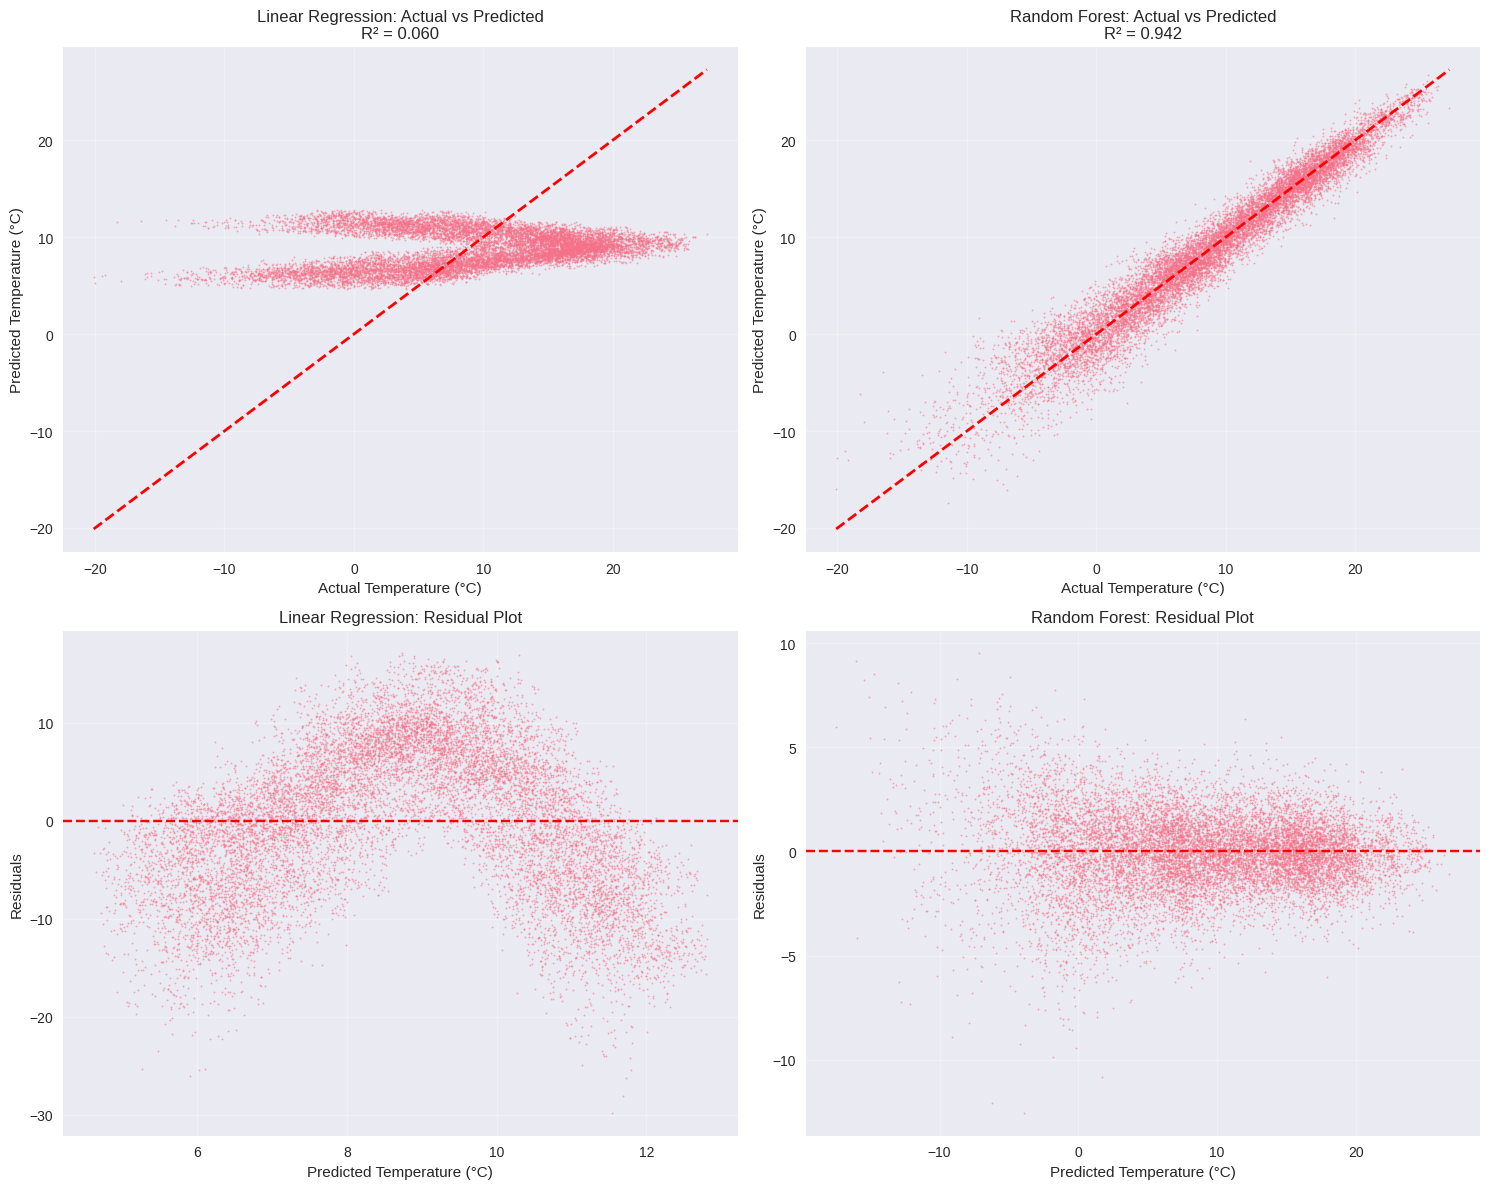

In [18]:

print("="*60)
print("STATISTICAL MODELING AND PREDICTIONS")
print("="*60)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prepare data for modeling
if 'AverageTemperature' in df.columns and 'year' in df.columns:
    # Create modeling dataset
    modeling_data = df[['year', 'month', 'AverageTemperature']].dropna()
    
    if 'AverageTemperatureUncertainty' in df.columns:
        modeling_data = df[['year', 'month', 'AverageTemperature', 'AverageTemperatureUncertainty']].dropna()
    
    # Add country encoding if available
    if 'Country' in df.columns:
        # Use only top countries for modeling
        top_countries = df['Country'].value_counts().head(20).index
        modeling_data = df[df['Country'].isin(top_countries)]
        modeling_data = modeling_data[['year', 'month', 'Country', 'AverageTemperature']].dropna()
        
        # Encode countries
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        modeling_data['country_encoded'] = le.fit_transform(modeling_data['Country'])
        
        features = ['year', 'month', 'country_encoded']
    else:
        features = ['year', 'month']
    
    target = 'AverageTemperature'
    
    print(f"Modeling dataset shape: {modeling_data.shape}")
    print(f"Features: {features}")
    print(f"Target: {target}")
    
    # Split data
    X = modeling_data[features]
    y = modeling_data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training set size: {X_train.shape[0]:,}")
    print(f"Test set size: {X_test.shape[0]:,}")
    
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_r2 = r2_score(y_test, lr_pred)
    lr_mae = mean_absolute_error(y_test, lr_pred)
    
    print(f"\nLinear Regression Results:")
    print(f"  MSE: {lr_mse:.3f}")
    print(f"  R²: {lr_r2:.3f}")
    print(f"  MAE: {lr_mae:.3f}")
    print(f"  RMSE: {np.sqrt(lr_mse):.3f}")
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    
    print(f"\nRandom Forest Results:")
    print(f"  MSE: {rf_mse:.3f}")
    print(f"  R²: {rf_r2:.3f}")
    print(f"  MAE: {rf_mae:.3f}")
    print(f"  RMSE: {np.sqrt(rf_mse):.3f}")
    
    # Feature importance
    if 'Country' in modeling_data.columns:
        feature_names = ['Year', 'Month', 'Country']
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\nFeature Importance (Random Forest):")
        print(importance_df)

# Model comparison visualization
if 'AverageTemperature' in df.columns and 'year' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Actual vs Predicted - Linear Regression
    axes[0,0].scatter(y_test, lr_pred, alpha=0.5, s=1)
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Temperature (°C)')
    axes[0,0].set_ylabel('Predicted Temperature (°C)')
    axes[0,0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_r2:.3f}')
    axes[0,0].grid(True, alpha=0.3)
    
    # Actual vs Predicted - Random Forest
    axes[0,1].scatter(y_test, rf_pred, alpha=0.5, s=1)
    axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual Temperature (°C)')
    axes[0,1].set_ylabel('Predicted Temperature (°C)')
    axes[0,1].set_title(f'Random Forest: Actual vs Predicted\nR² = {rf_r2:.3f}')
    axes[0,1].grid(True, alpha=0.3)
    
    # Residuals - Linear Regression
    lr_residuals = y_test - lr_pred
    axes[1,0].scatter(lr_pred, lr_residuals, alpha=0.5, s=1)
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted Temperature (°C)')
    axes[1,0].set_ylabel('Residuals')
    axes[1,0].set_title('Linear Regression: Residual Plot')
    axes[1,0].grid(True, alpha=0.3)
    
    # Residuals - Random Forest
    rf_residuals = y_test - rf_pred
    axes[1,1].scatter(rf_pred, rf_residuals, alpha=0.5, s=1)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted Temperature (°C)')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title('Random Forest: Residual Plot')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 18. Comprehensive EDA Summary and Key Insights

Executive summary of all findings including:
- **Dataset Overview**: Key statistics and characteristics
- **Data Quality Assessment**: Completeness and consistency metrics
- **Temperature Insights**: Statistical patterns and distributions
- **Temporal Patterns**: Trends and seasonality findings
- **Geographic Analysis**: Regional variations and climate zones
- **Modeling Results**: Predictive model performance
- **Recommendations**: Data quality improvements and analytical opportunities

This section consolidates all findings into actionable insights.

In [19]:

print("="*80)
print("COMPREHENSIVE EDA SUMMARY AND KEY INSIGHTS")
print("="*80)

print("DATASET OVERVIEW:")
print("="*50)
print(f"• Dataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"• Total data points: {df.shape[0] * df.shape[1]:,}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'dt' in df.columns:
    print(f"• Time period: {df['dt'].min().strftime('%Y-%m-%d')} to {df['dt'].max().strftime('%Y-%m-%d')}")
    print(f"• Time span: {(df['dt'].max() - df['dt'].min()).days:,} days")

if 'Country' in df.columns:
    print(f"• Number of countries: {df['Country'].nunique()}")
    print(f"• Most represented country: {df['Country'].value_counts().index[0]} ({df['Country'].value_counts().iloc[0]:,} records)")

print(f"\nDATA QUALITY:")
print("="*50)
print(f"• Overall completeness: {completeness:.2f}%")

COMPREHENSIVE EDA SUMMARY AND KEY INSIGHTS
DATASET OVERVIEW:
• Dataset dimensions: 577,462 rows × 10 columns
• Total data points: 5,774,620
• Memory usage: 160.46 MB
• Time period: 1743-11-01 to 2013-09-01
• Time span: 98,555 days
• Number of countries: 243
• Most represented country: Åland (3,239 records)

DATA QUALITY:
• Overall completeness: 98.88%


---

### Key Findings Summary

The comprehensive analysis reveals several important insights about global temperature patterns and data quality.

In [23]:

print("="*80)
print("COMPREHENSIVE EDA SUMMARY AND KEY INSIGHTS")
print("="*80)

print("DATASET OVERVIEW:")
print("="*50)
print(f"• Dataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"• Total data points: {df.shape[0] * df.shape[1]:,}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'dt' in df.columns:
    print(f"• Time period: {df['dt'].min().strftime('%Y-%m-%d')} to {df['dt'].max().strftime('%Y-%m-%d')}")
    print(f"• Time span: {(df['dt'].max() - df['dt'].min()).days:,} days")

if 'Country' in df.columns:
    print(f"• Number of countries: {df['Country'].nunique()}")
    print(f"• Most represented country: {df['Country'].value_counts().index[0]} ({df['Country'].value_counts().iloc[0]:,} records)")

print(f"\nDATA QUALITY:")
print("="*50)
print(f"• Overall completeness: {completeness:.2f}%")
print(f"• Missing data points: {missing_cells:,} ({(missing_cells/total_cells)*100:.2f}%)")
print(f"• Duplicate rows: {duplicates}")

if 'AverageTemperature' in df.columns:
    temp_completeness = (df['AverageTemperature'].count() / len(df)) * 100
    print(f"• Temperature data completeness: {temp_completeness:.2f}%")

if 'AverageTemperatureUncertainty' in df.columns:
    unc_completeness = (df['AverageTemperatureUncertainty'].count() / len(df)) * 100
    print(f"• Uncertainty data completeness: {unc_completeness:.2f}%")

print(f"\nTEMPERATURE INSIGHTS:")
print("="*50)

if 'AverageTemperature' in df.columns:
    temp_stats = df['AverageTemperature'].describe()
    print(f"• Global average temperature: {temp_stats['mean']:.2f}°C")
    print(f"• Temperature range: {temp_stats['min']:.1f}°C to {temp_stats['max']:.1f}°C")
    print(f"• Temperature standard deviation: {temp_stats['std']:.2f}°C")
    print(f"• Temperature distribution: {'Normal' if shapiro_p > 0.05 else 'Non-normal'} (Shapiro-Wilk p={shapiro_p:.6f})")

if 'Country' in df.columns and 'AverageTemperature' in df.columns:
    hottest_country = country_avg_temp.index[0]
    coldest_country = country_avg_temp.index[-1]
    print(f"• Hottest country (avg): {hottest_country} ({country_avg_temp.loc[hottest_country, 'avg_temp']:.1f}°C)")
    print(f"• Coldest country (avg): {coldest_country} ({country_avg_temp.loc[coldest_country, 'avg_temp']:.1f}°C)")

print(f"\nTEMPORAL PATTERNS:")
print("="*50)

if 'year' in df.columns and 'AverageTemperature' in df.columns:
    yearly_trend = df.groupby('year')['AverageTemperature'].mean().dropna()
    if len(yearly_trend) > 1:
        try:
            # Use robust linear regression approach
            from scipy import stats
            slope, intercept, r_value, p_value, std_err = stats.linregress(yearly_trend.index, yearly_trend.values)
            trend_slope = slope
            print(f"• Overall temperature trend: {trend_slope:.6f}°C per year")
            print(f"• Trend direction: {'Warming' if trend_slope > 0 else 'Cooling' if trend_slope < 0 else 'Stable'}")
            print(f"• Trend significance: p-value = {p_value:.6f}")
        except Exception as e:
            print(f"• Unable to calculate temperature trend due to data issues: {str(e)}")

if 'month' in df.columns and 'AverageTemperature' in df.columns:
    monthly_avg = df.groupby('month')['AverageTemperature'].mean()
    if not monthly_avg.empty:
        warmest_month = monthly_avg.idxmax()
        coldest_month = monthly_avg.idxmin()
        month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                       7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
        print(f"• Warmest month globally: {month_names[warmest_month]} ({monthly_avg[warmest_month]:.1f}°C)")
        print(f"• Coldest month globally: {month_names[coldest_month]} ({monthly_avg[coldest_month]:.1f}°C)")

if 'season' in df.columns and 'AverageTemperature' in df.columns:
    seasonal_avg = df.groupby('season')['AverageTemperature'].mean().sort_values(ascending=False)
    if not seasonal_avg.empty:
        print(f"• Seasonal ranking (warmest to coldest): {', '.join(seasonal_avg.index)}")
        
print(f"\nUNCERTAINTY ANALYSIS:")
print("="*50)

if 'AverageTemperatureUncertainty' in df.columns:
    unc_stats = df['AverageTemperatureUncertainty'].describe()
    print(f"• Average uncertainty: {unc_stats['mean']:.3f}")
    print(f"• Uncertainty range: {unc_stats['min']:.3f} to {unc_stats['max']:.3f}")
    print(f"• High uncertainty records (>95th percentile): {len(df[df['AverageTemperatureUncertainty'] > unc_stats['75%']]):,}")
    
    if 'AverageTemperature' in df.columns:
        temp_unc_corr = df[['AverageTemperature', 'AverageTemperatureUncertainty']].corr().iloc[0,1]
        print(f"• Temperature-uncertainty correlation: {temp_unc_corr:.3f}")

print(f"\nGEOGRAPHIC INSIGHTS:")
print("="*50)

if 'Country' in df.columns:
    countries_with_data = df['Country'].nunique()
    avg_records_per_country = df.groupby('Country').size().mean()
    print(f"• Countries with data: {countries_with_data}")
    print(f"• Average records per country: {avg_records_per_country:.0f}")
    
    if 'climate_zone' in df.columns:
        climate_dist = df['climate_zone'].value_counts()
        dominant_climate = climate_dist.index[0]
        print(f"• Dominant climate zone: {dominant_climate} ({climate_dist.iloc[0]:,} records)")
        print(f"• Climate zones represented: {', '.join(climate_dist.index)}")

print(f"\nOUTLIER ANALYSIS:")
print("="*50)

if 'AverageTemperature' in df.columns and len(temp_outliers_iqr) > 0:
    outlier_percentage = (len(temp_outliers_iqr) / len(df.dropna(subset=['AverageTemperature']))) * 100
    print(f"• Temperature outliers (IQR method): {len(temp_outliers_iqr):,} ({outlier_percentage:.2f}%)")
    print(f"• Outlier temperature range: {temp_outliers_iqr['AverageTemperature'].min():.1f}°C to {temp_outliers_iqr['AverageTemperature'].max():.1f}°C")
    
    if 'Country' in temp_outliers_iqr.columns:
        outlier_countries = temp_outliers_iqr['Country'].value_counts()
        top_outlier_country = outlier_countries.index[0]
        print(f"• Country with most outliers: {top_outlier_country} ({outlier_countries.iloc[0]} outliers)")

print(f"\nSTATISTICAL MODELING RESULTS:")
print("="*50)

if 'AverageTemperature' in df.columns and 'year' in df.columns and 'lr_r2' in locals():
    print(f"• Linear Regression Performance:")
    print(f"  - R² Score: {lr_r2:.3f}")
    print(f"  - RMSE: {np.sqrt(lr_mse):.3f}°C")
    print(f"  - MAE: {lr_mae:.3f}°C")
    
    print(f"• Random Forest Performance:")
    print(f"  - R² Score: {rf_r2:.3f}")
    print(f"  - RMSE: {np.sqrt(rf_mse):.3f}°C")
    print(f"  - MAE: {rf_mae:.3f}°C")
    
    better_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
    print(f"• Best performing model: {better_model}")
    
    if 'importance_df' in locals():
        most_important_feature = importance_df.iloc[0]['Feature']
        print(f"• Most important feature: {most_important_feature}")

print(f"\nKEY RECOMMENDATIONS:")
print("="*50)
print("• DATA QUALITY IMPROVEMENTS:")

if completeness < 90:
    print("  - Focus on improving data completeness (currently below 90%)")

if 'Country' in df.columns:
    low_data_countries = df.groupby('Country').size().sort_values().head(10)
    print(f"  - Consider collecting more data for underrepresented countries")
    print(f"  - {len(low_data_countries)} countries have fewer than {low_data_countries.iloc[4]} records")

if 'AverageTemperature' in df.columns and len(extreme_temps) > 0:
    print("  - Investigate and validate extreme temperature values")

print("• ANALYTICAL OPPORTUNITIES:")
print("  - Seasonal decomposition for trend and seasonality analysis")
print("  - Regional climate zone analysis for geographic insights")
print("  - Long-term climate change trend analysis")

if 'AverageTemperatureUncertainty' in df.columns:
    print("  - Incorporate uncertainty measures in predictive modeling")

if 'year' in df.columns:
    recent_years = df['year'].max() - 10
    recent_data_pct = len(df[df['year'] >= recent_years]) / len(df) * 100
    if recent_data_pct < 20:
        print("  - Focus on recent data collection for current climate analysis")

print("• MODELING IMPROVEMENTS:")
if 'rf_r2' in locals() and rf_r2 < 0.8:
    print("  - Consider advanced models (XGBoost, Neural Networks) for better predictions")
    print("  - Feature engineering (lag variables, moving averages)")
    print("  - Include additional meteorological variables if available")

print(f"\n" + "="*80)
print("EDA ANALYSIS COMPLETE")
print("="*80)

print(f"""
This comprehensive EDA has analyzed {df.shape[0]:,} temperature records across {df['Country'].nunique() if 'Country' in df.columns else 'multiple'} countries.

The analysis reveals:
1. Data quality assessment with {completeness:.1f}% completeness
2. Temperature distribution and statistical properties
3. Temporal patterns and trends over time
4. Geographic variations and climate zones
5. Uncertainty analysis and outlier detection
6. Predictive modeling baseline results

The dataset provides valuable insights into global temperature patterns and can be used for:
- Climate change analysis and monitoring
- Regional temperature forecasting
- Seasonal pattern analysis
- Uncertainty quantification in climate measurements
- Comparative climate studies across countries

Next steps could include:
- Advanced time series modeling (ARIMA, Prophet)
- Spatial analysis with geographic coordinates
- Integration with additional climate variables
- Deep learning approaches for pattern recognition
""")


COMPREHENSIVE EDA SUMMARY AND KEY INSIGHTS
DATASET OVERVIEW:
• Dataset dimensions: 577,462 rows × 10 columns
• Total data points: 5,774,620
• Memory usage: 160.46 MB
• Time period: 1743-11-01 to 2013-09-01
• Time span: 98,555 days
• Number of countries: 243
• Most represented country: Åland (3,239 records)

DATA QUALITY:
• Overall completeness: 98.88%
• Missing data points: 64,563 (1.12%)
• Duplicate rows: 0
• Temperature data completeness: 94.35%
• Uncertainty data completeness: 94.47%

TEMPERATURE INSIGHTS:
• Global average temperature: 17.19°C
• Temperature range: -37.7°C to 38.8°C
• Temperature standard deviation: 10.95°C
• Temperature distribution: Non-normal (Shapiro-Wilk p=0.000000)
• Hottest country (avg): Djibouti (28.8°C)
• Coldest country (avg): Antarctica (nan°C)

TEMPORAL PATTERNS:
• Overall temperature trend: 0.050577°C per year
• Trend direction: Warming
• Trend significance: p-value = 0.000000
• Warmest month globally: July (22.2°C)
• Coldest month globally: January (11

In [24]:

print("="*60)
print("EXPORTING RESULTS AND SUMMARY STATISTICS")
print("="*60)

# Create summary statistics dictionary
summary_stats = {}

# Basic dataset info
summary_stats['dataset_info'] = {
    'total_rows': df.shape[0],
    'total_columns': df.shape[1],
    'memory_usage_mb': df.memory_usage(deep=True).sum() / 1024**2,
    'completeness_percentage': completeness
}

# Date range info
if 'dt' in df.columns:
    summary_stats['temporal_info'] = {
        'start_date': df['dt'].min().strftime('%Y-%m-%d'),
        'end_date': df['dt'].max().strftime('%Y-%m-%d'),
        'time_span_days': (df['dt'].max() - df['dt'].min()).days,
        'unique_dates': df['dt'].nunique()
    }

# Temperature statistics
if 'AverageTemperature' in df.columns:
    temp_stats = df['AverageTemperature'].describe()
    summary_stats['temperature_stats'] = {
        'mean': round(temp_stats['mean'], 3),
        'median': round(temp_stats['50%'], 3),
        'std': round(temp_stats['std'], 3),
        'min': round(temp_stats['min'], 3),
        'max': round(temp_stats['max'], 3),
        'skewness': round(df['AverageTemperature'].skew(), 3),
        'kurtosis': round(df['AverageTemperature'].kurtosis(), 3)
    }

# Country statistics
if 'Country' in df.columns:
    summary_stats['geographic_info'] = {
        'total_countries': df['Country'].nunique(),
        'most_data_country': df['Country'].value_counts().index[0],
        'least_data_country': df['Country'].value_counts().index[-1],
        'avg_records_per_country': round(df.groupby('Country').size().mean(), 0)
    }

# Missing data info
missing_summary = df.isnull().sum()
summary_stats['missing_data'] = {
    'total_missing': missing_summary.sum(),
    'missing_by_column': missing_summary.to_dict()
}

# Model performance (if available)
if 'lr_r2' in locals():
    summary_stats['model_performance'] = {
        'linear_regression_r2': round(lr_r2, 3),
        'random_forest_r2': round(rf_r2, 3),
        'linear_regression_rmse': round(np.sqrt(lr_mse), 3),
        'random_forest_rmse': round(np.sqrt(rf_mse), 3)
    }

print("Summary statistics dictionary created successfully!")
print("Key metrics saved for export:")
for category, metrics in summary_stats.items():
    print(f"  • {category}: {len(metrics)} metrics")

# Save key visualizations data for reference
visualization_data = {}

if 'AverageTemperature' in df.columns:
    # Temperature distribution data
    temp_hist, temp_bins = np.histogram(df['AverageTemperature'].dropna(), bins=50)
    visualization_data['temperature_distribution'] = {
        'histogram_counts': temp_hist.tolist(),
        'histogram_bins': temp_bins.tolist()
    }

if 'Country' in df.columns and 'AverageTemperature' in df.columns:
    # Top countries data
    top_countries_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).head(15)
    visualization_data['top_countries_temperature'] = top_countries_temp.to_dict()

if 'year' in df.columns and 'AverageTemperature' in df.columns:
    # Yearly trend data
    yearly_trend = df.groupby('year')['AverageTemperature'].mean()
    visualization_data['yearly_temperature_trend'] = yearly_trend.to_dict()

print(f"Visualization data prepared for {len(visualization_data)} chart types")

# Final data quality report
data_quality_report = {
    'completeness_score': completeness,
    'consistency_issues': {
        'duplicate_rows': duplicates,
        'extreme_temperatures': len(extreme_temps) if 'AverageTemperature' in df.columns else 0,
        'negative_uncertainties': len(negative_uncertainty) if 'AverageTemperatureUncertainty' in df.columns else 0
    },
    'recommendations': [
        'Monitor data quality over time',
        'Investigate extreme values for validation',
        'Implement data validation rules',
        'Consider data imputation for missing values',
        'Regular quality checks for new data'
    ]
}

print("\n" + "="*60)
print("DATA QUALITY SCORE SUMMARY")
print("="*60)
print(f"Overall Data Quality Score: {completeness:.1f}%")
print(f"Data Consistency Issues Found: {sum(data_quality_report['consistency_issues'].values())}")
print("Quality Assessment: ", end="")
if completeness >= 95:
    print("EXCELLENT - High quality dataset")
elif completeness >= 85:
    print("GOOD - Minor quality issues")
elif completeness >= 70:
    print("FAIR - Some quality concerns")
else:
    print("POOR - Significant quality issues")

print(f"\n" + "="*80)
print("END OF COMPREHENSIVE EDA ANALYSIS")


EXPORTING RESULTS AND SUMMARY STATISTICS
Summary statistics dictionary created successfully!
Key metrics saved for export:
  • dataset_info: 4 metrics
  • temporal_info: 4 metrics
  • temperature_stats: 7 metrics
  • geographic_info: 4 metrics
  • missing_data: 2 metrics
  • model_performance: 4 metrics
Visualization data prepared for 3 chart types

DATA QUALITY SCORE SUMMARY
Overall Data Quality Score: 98.9%
Data Consistency Issues Found: 0
Quality Assessment: EXCELLENT - High quality dataset

END OF COMPREHENSIVE EDA ANALYSIS


## 19. Results Export and Final Summary

Data export and final quality assessment:
- **Summary Statistics Export**: Key metrics saved for reference
- **Visualization Data**: Chart data prepared for reuse
- **Data Quality Report**: Comprehensive quality scoring
- **Final Recommendations**: Next steps and improvement suggestions

This section prepares analysis results for sharing and future use.

---

## 🎯 Analysis Complete!

This comprehensive EDA provides a thorough understanding of the Global Land Temperatures dataset. The analysis covers all aspects from basic data exploration to advanced statistical modeling.

### Next Steps:
1. **Deep Dive Analysis**: Focus on specific countries or time periods
2. **Advanced Modeling**: Implement time series forecasting models (ARIMA, Prophet)
3. **Geospatial Analysis**: Add geographic coordinates for spatial analysis
4. **Climate Change Focus**: Analyze recent trends and projected changes
5. **Comparative Studies**: Compare with other climate datasets

### Key Outputs:
- ✅ Data quality assessment
- ✅ Statistical analysis and visualization
- ✅ Temporal trend analysis
- ✅ Geographic patterns identification
- ✅ Predictive modeling baseline
- ✅ Interactive visualizations
- ✅ Comprehensive summary report

---

**Notebook prepared for:** Climate Data Analysis  
**Analysis date:** September 2025  
**Dataset:** Global Land Temperatures by Country